# **Edge Detection Tools**

# **Libraries**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from PIL import Image
import colorsys


# **Look Up Table**

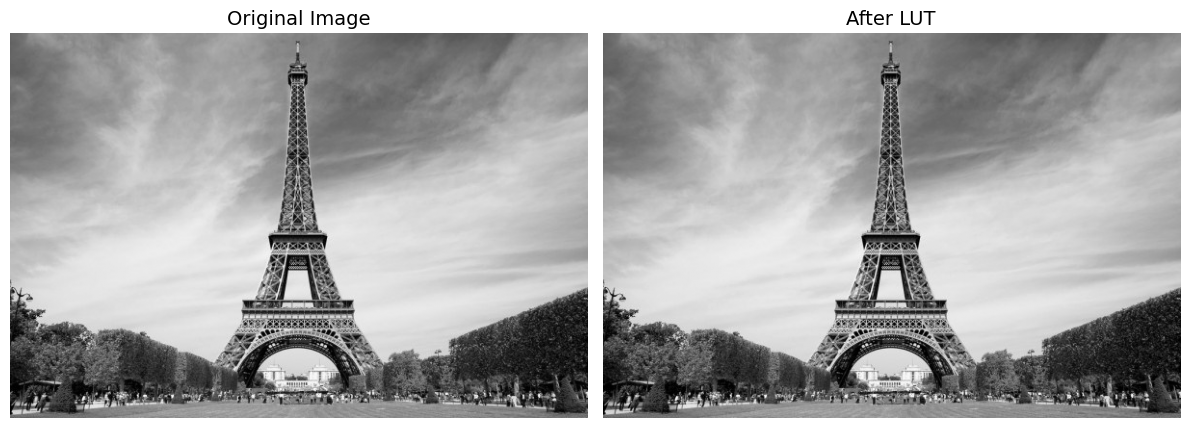

LUT mapping (first 10 values):
Input: 0 -> Output: 0
Input: 1 -> Output: 0
Input: 2 -> Output: 1
Input: 3 -> Output: 1
Input: 4 -> Output: 2
Input: 5 -> Output: 3
Input: 6 -> Output: 4
Input: 7 -> Output: 5
Input: 8 -> Output: 6
Input: 9 -> Output: 7


In [6]:
width, height = 256, 256
img_array = np.tile(np.arange(256, dtype=np.uint8), (height, 1))
original_image = Image.fromarray(img_array)

original_image = Image.open('./img/eyfel.jpg')
original_image = original_image.convert('L')  # Convert to grayscale

img_array = np.array(original_image)

#Define Lut
lut = np.array([0, 0, 1, 1, 2, 3, 4, 5] + list(range(6, 256)), dtype=np.uint8)

lut_image_array = lut[img_array]
lut_image = Image.fromarray(lut_image_array)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image', fontsize=14)
axes[0].axis('off')


axes[1].imshow(lut_image, cmap='gray')
axes[1].set_title('After LUT', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("LUT mapping (first 10 values):")
for i in range(10):
    print(f"Input: {i} -> Output: {lut[i]}")


# **Operation of a 3-bit look-up table** 

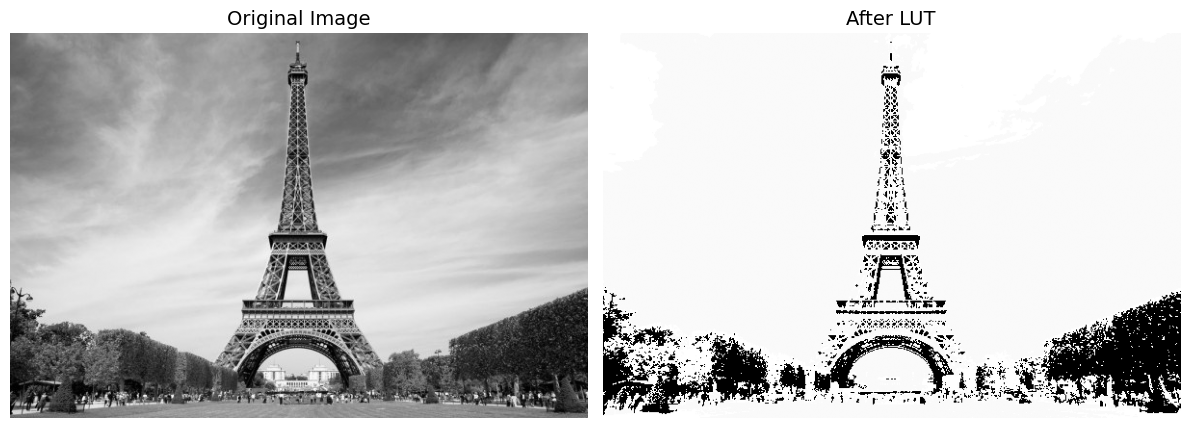

3-bit LUT mapping:
Input (3-bit) -> Output
000 (0) -> 0
001 (1) -> 0
010 (2) -> 1
011 (3) -> 1
100 (4) -> 2
101 (5) -> 3
110 (6) -> 4
111 (7) -> 5


In [9]:


width, height = 256, 256
img_array = np.tile(np.arange(256, dtype=np.uint8), (height, 1))
original_image = Image.fromarray(img_array)

original_image = Image.open('./img/eyfel.jpg')
original_image = original_image.convert('L')  # Convert to grayscale 

img_array = np.array(original_image)

# Define 3-bit LUT 
lut_3bit = np.array([0, 0, 1, 1, 2, 3, 4, 5], dtype=np.uint8)

indices = img_array >> 5  #

lut_output = lut_3bit[indices]

lut_image_array = (lut_output * 255) // 5  
lut_image = Image.fromarray(lut_image_array)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image', fontsize=14)
axes[0].axis('off')

axes[1].imshow(lut_image, cmap='gray')
axes[1].set_title('After LUT', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("3-bit LUT mapping:")
print("Input (3-bit) -> Output")
for i in range(8):
    print(f"{i:03b} ({i}) -> {lut_3bit[i]}")
    


# **Histogram**
**The pixel intensities are plotted along the x-axis and the number of occurrences for each intensity are plotted along the y-axis**

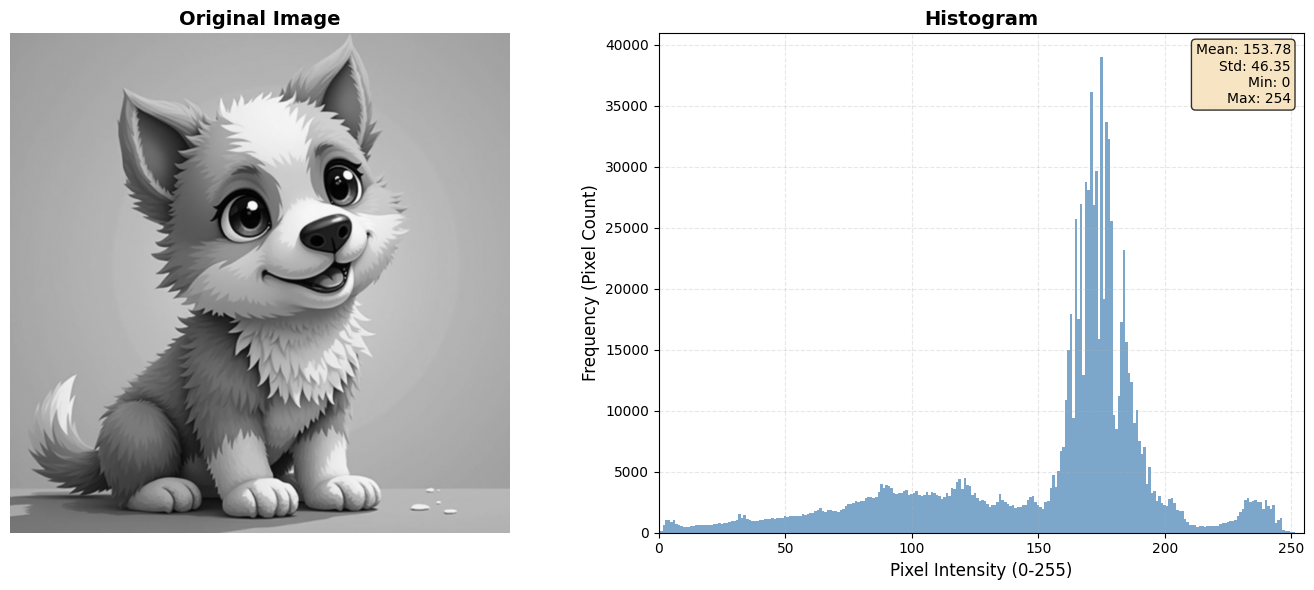

Image shape: (1024, 1024)
Total pixels: 1048576

Pixel intensity distribution:
Mean intensity: 153.78
Standard deviation: 46.35
Min intensity: 0
Max intensity: 254


In [11]:


image_path = './img/300dog (1).jpeg' 
original_image = Image.open(image_path)


if original_image.mode != 'L':
    original_image = original_image.convert('L')


img_array = np.array(original_image)

hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0, 256))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].bar(range(256), hist, width=1.0, color='steelblue', alpha=0.7)
axes[1].set_title('Histogram', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Pixel Intensity (0-255)', fontsize=12)
axes[1].set_ylabel('Frequency (Pixel Count)', fontsize=12)
axes[1].set_xlim([0, 255])
axes[1].grid(True, alpha=0.3, linestyle='--')

stats_text = f'Mean: {np.mean(img_array):.2f}\n'
stats_text += f'Std: {np.std(img_array):.2f}\n'
stats_text += f'Min: {np.min(img_array)}\n'
stats_text += f'Max: {np.max(img_array)}'
axes[1].text(0.98, 0.98, stats_text, transform=axes[1].transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Image shape: {img_array.shape}")
print(f"Total pixels: {img_array.size}")
print(f"\nPixel intensity distribution:")
print(f"Mean intensity: {np.mean(img_array):.2f}")
print(f"Standard deviation: {np.std(img_array):.2f}")
print(f"Min intensity: {np.min(img_array)}")
print(f"Max intensity: {np.max(img_array)}")

# **Histogram experiments**
**HISTOGRAM OPERATIONS (+40, -40, ×1.2, ÷1.2)**

PART 1: HISTOGRAM OPERATIONS (+40, -40, ×1.2, ÷1.2)


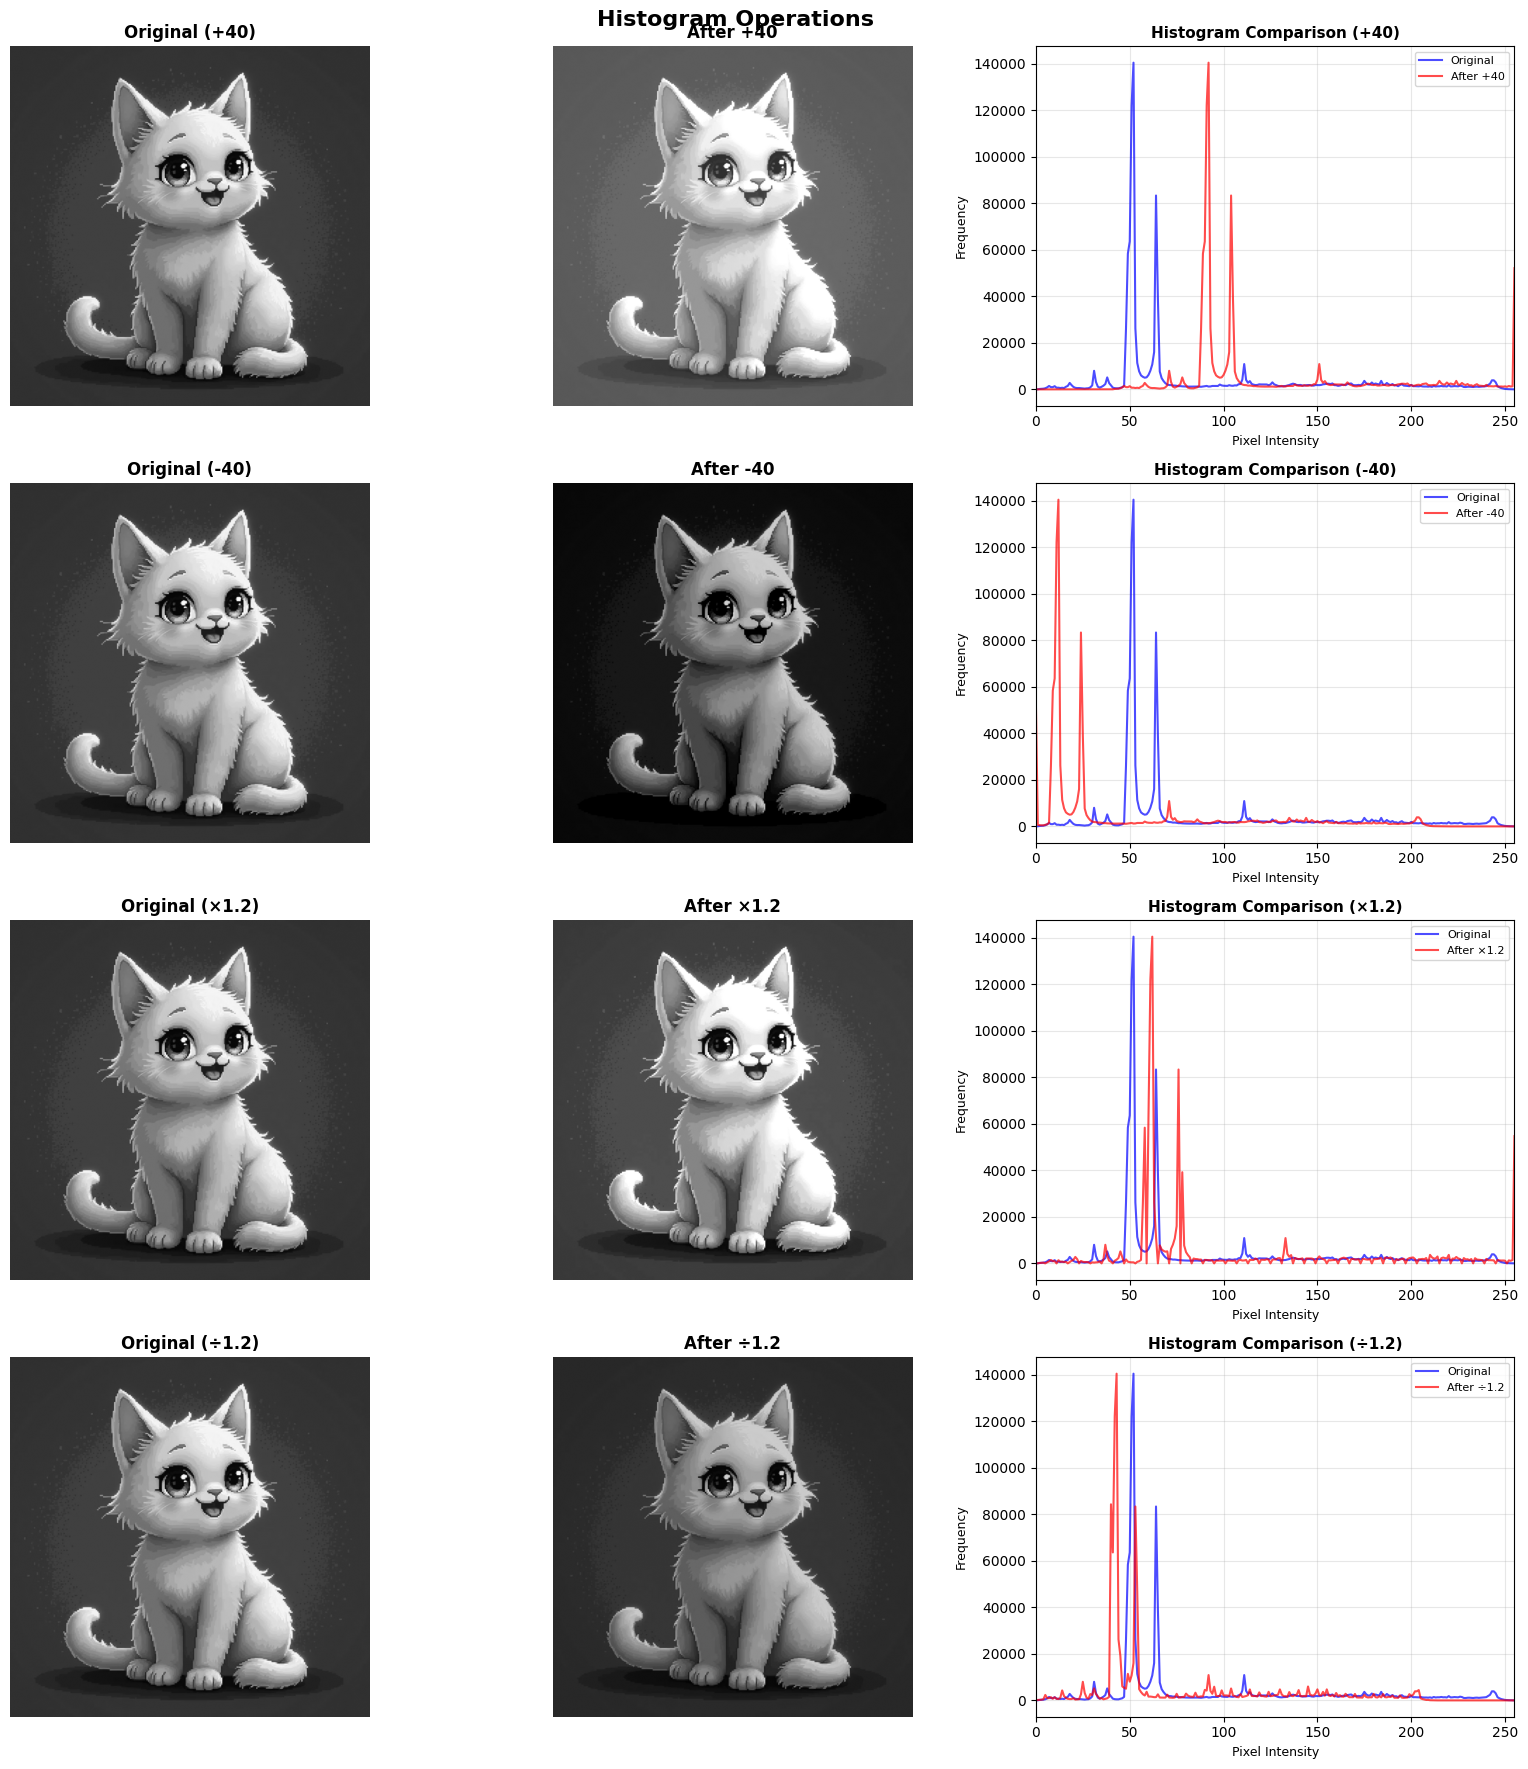


PART 2: RGB vs GRAYSCALE COMPARISON


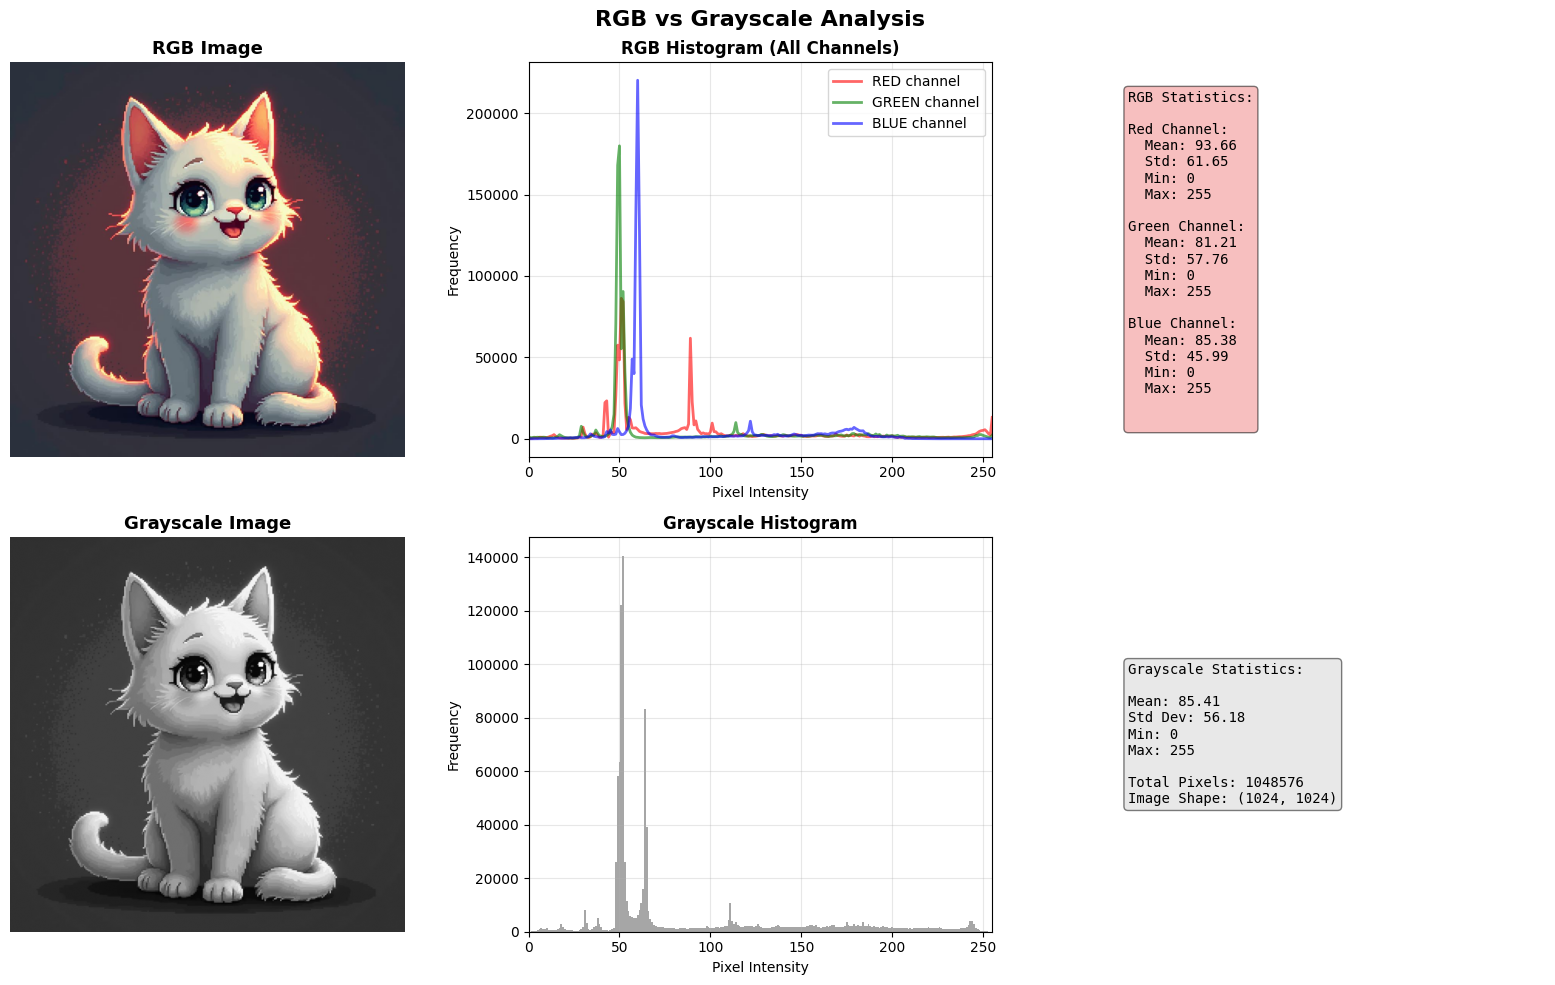


Completed!


In [15]:

image_path = './img/300cat (1).jpeg' 
original_image = Image.open(image_path)

# Convert to grayscale
if original_image.mode != 'L':
    gray_image = original_image.convert('L')
else:
    gray_image = original_image

img_array = np.array(gray_image, dtype=np.float32)

print("=" * 60)
print("PART 1: HISTOGRAM OPERATIONS (+40, -40, ×1.2, ÷1.2)")
print("=" * 60)

img_plus40 = np.clip(img_array + 40, 0, 255).astype(np.uint8)
img_minus40 = np.clip(img_array - 40, 0, 255).astype(np.uint8)
img_mult12 = np.clip(img_array * 1.2, 0, 255).astype(np.uint8)
img_div12 = np.clip(img_array / 1.2, 0, 255).astype(np.uint8)


fig, axes = plt.subplots(4, 3, figsize=(16, 18))
fig.suptitle('Histogram Operations', fontsize=16, fontweight='bold')

operations = [
    (img_array.astype(np.uint8), img_plus40, '+40', 'Original', 'After +40'),
    (img_array.astype(np.uint8), img_minus40, '-40', 'Original', 'After -40'),
    (img_array.astype(np.uint8), img_mult12, '×1.2', 'Original', 'After ×1.2'),
    (img_array.astype(np.uint8), img_div12, '÷1.2', 'Original', 'After ÷1.2')
]

for i, (orig, processed, op_name, orig_title, proc_title) in enumerate(operations):

    axes[i, 0].imshow(orig, cmap='gray', vmin=0, vmax=255)
    axes[i, 0].set_title(f'{orig_title} ({op_name})', fontsize=12, fontweight='bold')
    axes[i, 0].axis('off')
    
 
    axes[i, 1].imshow(processed, cmap='gray', vmin=0, vmax=255)
    axes[i, 1].set_title(proc_title, fontsize=12, fontweight='bold')
    axes[i, 1].axis('off')
    

    hist_orig = np.histogram(orig.flatten(), bins=256, range=(0, 256))[0]
    hist_proc = np.histogram(processed.flatten(), bins=256, range=(0, 256))[0]
    
    axes[i, 2].plot(range(256), hist_orig, color='blue', alpha=0.7, linewidth=1.5, label='Original')
    axes[i, 2].plot(range(256), hist_proc, color='red', alpha=0.7, linewidth=1.5, label=proc_title)
    axes[i, 2].set_title(f'Histogram Comparison ({op_name})', fontsize=11, fontweight='bold')
    axes[i, 2].set_xlabel('Pixel Intensity', fontsize=9)
    axes[i, 2].set_ylabel('Frequency', fontsize=9)
    axes[i, 2].set_xlim([0, 255])
    axes[i, 2].legend(fontsize=8)
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("PART 2: RGB vs GRAYSCALE COMPARISON")
print("=" * 60)

rgb_image = Image.open(image_path)
if rgb_image.mode != 'RGB':
    rgb_image = rgb_image.convert('RGB')

rgb_array = np.array(rgb_image)
gray_array = np.array(gray_image)

fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
fig2.suptitle('RGB vs Grayscale Analysis', fontsize=16, fontweight='bold')


axes2[0, 0].imshow(rgb_image)
axes2[0, 0].set_title('RGB Image', fontsize=13, fontweight='bold')
axes2[0, 0].axis('off')

axes2[1, 0].imshow(gray_image, cmap='gray')
axes2[1, 0].set_title('Grayscale Image', fontsize=13, fontweight='bold')
axes2[1, 0].axis('off')

colors = ('red', 'green', 'blue')
for idx, color in enumerate(colors):
    hist = np.histogram(rgb_array[:, :, idx].flatten(), bins=256, range=(0, 256))[0]
    axes2[0, 1].plot(range(256), hist, color=color, alpha=0.6, linewidth=2, label=f'{color.upper()} channel')

axes2[0, 1].set_title('RGB Histogram (All Channels)', fontsize=12, fontweight='bold')
axes2[0, 1].set_xlabel('Pixel Intensity', fontsize=10)
axes2[0, 1].set_ylabel('Frequency', fontsize=10)
axes2[0, 1].set_xlim([0, 255])
axes2[0, 1].legend()
axes2[0, 1].grid(True, alpha=0.3)

hist_gray = np.histogram(gray_array.flatten(), bins=256, range=(0, 256))[0]
axes2[1, 1].bar(range(256), hist_gray, width=1.0, color='gray', alpha=0.7)
axes2[1, 1].set_title('Grayscale Histogram', fontsize=12, fontweight='bold')
axes2[1, 1].set_xlabel('Pixel Intensity', fontsize=10)
axes2[1, 1].set_ylabel('Frequency', fontsize=10)
axes2[1, 1].set_xlim([0, 255])
axes2[1, 1].grid(True, alpha=0.3)


axes2[0, 2].axis('off')
rgb_stats = "RGB Statistics:\n\n"
for idx, color in enumerate(['Red', 'Green', 'Blue']):
    channel_data = rgb_array[:, :, idx]
    rgb_stats += f"{color} Channel:\n"
    rgb_stats += f"  Mean: {np.mean(channel_data):.2f}\n"
    rgb_stats += f"  Std: {np.std(channel_data):.2f}\n"
    rgb_stats += f"  Min: {np.min(channel_data)}\n"
    rgb_stats += f"  Max: {np.max(channel_data)}\n\n"

axes2[0, 2].text(0.1, 0.5, rgb_stats, fontsize=10, family='monospace',
                 verticalalignment='center', 
                 bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))


axes2[1, 2].axis('off')
gray_stats = "Grayscale Statistics:\n\n"
gray_stats += f"Mean: {np.mean(gray_array):.2f}\n"
gray_stats += f"Std Dev: {np.std(gray_array):.2f}\n"
gray_stats += f"Min: {np.min(gray_array)}\n"
gray_stats += f"Max: {np.max(gray_array)}\n\n"
gray_stats += f"Total Pixels: {gray_array.size}\n"
gray_stats += f"Image Shape: {gray_array.shape}"

axes2[1, 2].text(0.1, 0.5, gray_stats, fontsize=10, family='monospace',
                 verticalalignment='center',
                 bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nCompleted!")

# **Histogram Equalization**
**[Method1]
Step 1: Compute histogram**

**Step 2 : Calculate normalized sum of histogram
Factor-based (7/16 ≈ 0.4375)** 

**Step 3: Transform input image to output image
Image transform using LUT**

STEP 1: COMPUTE HISTOGRAM
Total pixels: 240000
Histogram computed for 256 intensity levels
Sample histogram values: [ 38 133 151 130 216 208 201 217 199 247]

STEP 2: HISTOGRAM EQUALIZATION WITH FACTOR 7/16
Normalization factor: 7/16 = 0.4375
CDF calculated and normalized
Equalized image created
Equalized range: [0, 111]

STEP 3: IMAGE TRANSFORM USING LUT
LUT Mapping applied:
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 5
  5 → 7
  6+ → sequential
Final output range: [0, 111]


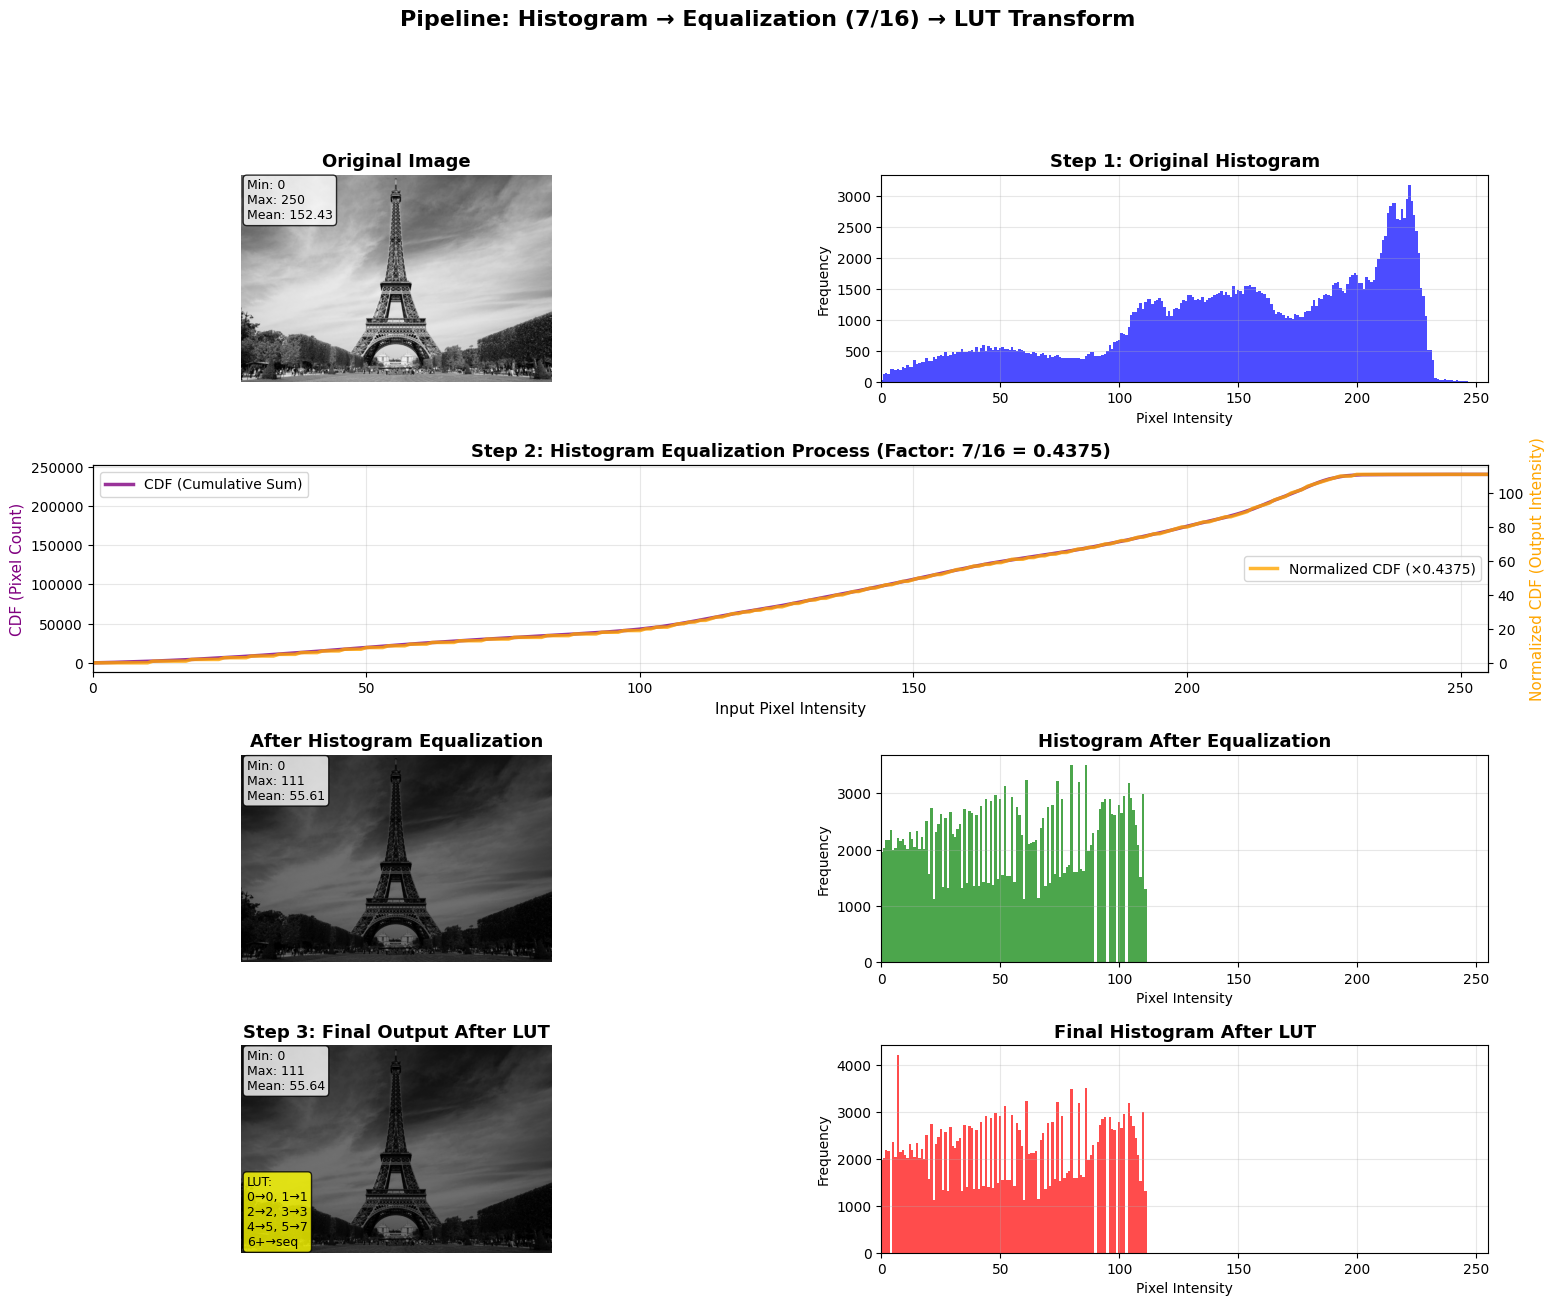


PROCESSING PIPELINE SUMMARY

1. Original Image:
   Range: [0, 250]
   Mean: 152.43, Std: 58.45

2. After Equalization (factor 7/16):
   Range: [0, 111]
   Mean: 55.61, Std: 32.32

3. After LUT Transform:
   Range: [0, 111]
   Mean: 55.64, Std: 32.28

Total pixels: 240000


In [ ]:

image_path = './img/eyfel.jpg'  
original_image = Image.open(image_path)

if original_image.mode != 'L':
    original_image = original_image.convert('L')


img_array = np.array(original_image, dtype=np.uint8)

hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0, 256))

print("=" * 70)
print("STEP 1: COMPUTE HISTOGRAM")
print("=" * 70)
print(f"Total pixels: {img_array.size}")
print(f"Histogram computed for 256 intensity levels")
print(f"Sample histogram values: {hist[:10]}")

normalization_factor = 7 / 16


cdf = np.cumsum(hist)

total_pixels = img_array.size
cdf_normalized = (cdf / total_pixels) * normalization_factor * 255

cdf_normalized = np.clip(cdf_normalized, 0, 255).astype(np.uint8)

equalized_image = cdf_normalized[img_array]

print("\n" + "=" * 70)
print("STEP 2: HISTOGRAM EQUALIZATION WITH FACTOR 7/16")
print("=" * 70)
print(f"Normalization factor: 7/16 = {normalization_factor:.4f}")
print(f"CDF calculated and normalized")
print(f"Equalized image created")
print(f"Equalized range: [{np.min(equalized_image)}, {np.max(equalized_image)}]")


custom_lut = np.arange(256, dtype=np.uint8)

custom_lut[0] = 0
custom_lut[1] = 1
custom_lut[2] = 2
custom_lut[3] = 3
custom_lut[4] = 5
custom_lut[5] = 7

final_output = custom_lut[equalized_image]

print("\n" + "=" * 70)
print("STEP 3: IMAGE TRANSFORM USING LUT")
print("=" * 70)
print("LUT Mapping applied:")
print("  0 → 0")
print("  1 → 1")
print("  2 → 2")
print("  3 → 3")
print("  4 → 5")
print("  5 → 7")
print("  6+ → sequential")
print(f"Final output range: [{np.min(final_output)}, {np.max(final_output)}]")


hist_equalized, _ = np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))
hist_final, _ = np.histogram(final_output.flatten(), bins=256, range=(0, 256))

fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 2, hspace=0.4, wspace=0.3)


ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img_array, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image', fontsize=13, fontweight='bold')
ax1.axis('off')
stats_orig = f'Min: {np.min(img_array)}\nMax: {np.max(img_array)}\nMean: {np.mean(img_array):.2f}'
ax1.text(0.02, 0.98, stats_orig, transform=ax1.transAxes, fontsize=9, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(range(256), hist, width=1.0, color='blue', alpha=0.7)
ax2.set_title('Step 1: Original Histogram', fontsize=13, fontweight='bold')
ax2.set_xlabel('Pixel Intensity', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.set_xlim([0, 255])
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(range(256), cdf, color='purple', linewidth=2.5, label='CDF (Cumulative Sum)', alpha=0.8)
ax3_twin = ax3.twinx()
ax3_twin.plot(range(256), cdf_normalized, color='orange', linewidth=2.5, 
              label=f'Normalized CDF (×{normalization_factor:.4f})', alpha=0.8)
ax3.set_title(f'Step 2: Histogram Equalization Process (Factor: 7/16 = {normalization_factor:.4f})', 
              fontsize=13, fontweight='bold')
ax3.set_xlabel('Input Pixel Intensity', fontsize=11)
ax3.set_ylabel('CDF (Pixel Count)', fontsize=11, color='purple')
ax3_twin.set_ylabel('Normalized CDF (Output Intensity)', fontsize=11, color='orange')
ax3.set_xlim([0, 255])
ax3.legend(loc='upper left', fontsize=10)
ax3_twin.legend(loc='center right', fontsize=10)
ax3.grid(True, alpha=0.3)


ax4 = fig.add_subplot(gs[2, 0])
ax4.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
ax4.set_title('After Histogram Equalization', fontsize=13, fontweight='bold')
ax4.axis('off')
stats_eq = f'Min: {np.min(equalized_image)}\nMax: {np.max(equalized_image)}\nMean: {np.mean(equalized_image):.2f}'
ax4.text(0.02, 0.98, stats_eq, transform=ax4.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax5 = fig.add_subplot(gs[2, 1])
ax5.bar(range(256), hist_equalized, width=1.0, color='green', alpha=0.7)
ax5.set_title('Histogram After Equalization', fontsize=13, fontweight='bold')
ax5.set_xlabel('Pixel Intensity', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.set_xlim([0, 255])
ax5.grid(True, alpha=0.3)


ax6 = fig.add_subplot(gs[3, 0])
ax6.imshow(final_output, cmap='gray', vmin=0, vmax=255)
ax6.set_title('Step 3: Final Output After LUT', fontsize=13, fontweight='bold')
ax6.axis('off')
stats_final = f'Min: {np.min(final_output)}\nMax: {np.max(final_output)}\nMean: {np.mean(final_output):.2f}'
ax6.text(0.02, 0.98, stats_final, transform=ax6.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

lut_text = "LUT:\n0→0, 1→1\n2→2, 3→3\n4→5, 5→7\n6+→seq"
ax6.text(0.02, 0.02, lut_text, transform=ax6.transAxes, fontsize=9,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

ax7 = fig.add_subplot(gs[3, 1])
ax7.bar(range(256), hist_final, width=1.0, color='red', alpha=0.7)
ax7.set_title('Final Histogram After LUT', fontsize=13, fontweight='bold')
ax7.set_xlabel('Pixel Intensity', fontsize=10)
ax7.set_ylabel('Frequency', fontsize=10)
ax7.set_xlim([0, 255])
ax7.grid(True, alpha=0.3)

plt.suptitle('Pipeline: Histogram → Equalization (7/16) → LUT Transform', 
             fontsize=16, fontweight='bold', y=0.998)
plt.show()


print("\n" + "=" * 70)
print("PROCESSING PIPELINE SUMMARY")
print("=" * 70)
print(f"\n1. Original Image:")
print(f"   Range: [{np.min(img_array)}, {np.max(img_array)}]")
print(f"   Mean: {np.mean(img_array):.2f}, Std: {np.std(img_array):.2f}")

print(f"\n2. After Equalization (factor 7/16):")
print(f"   Range: [{np.min(equalized_image)}, {np.max(equalized_image)}]")
print(f"   Mean: {np.mean(equalized_image):.2f}, Std: {np.std(equalized_image):.2f}")

print(f"\n3. After LUT Transform:")
print(f"   Range: [{np.min(final_output)}, {np.max(final_output)}]")
print(f"   Mean: {np.mean(final_output):.2f}, Std: {np.std(final_output):.2f}")

print(f"\nTotal pixels: {img_array.size}")

# **Histogram Equalization**
**RGB - Saturated Photo**

**Saturation increased by factor: 1.5**

**BOTTOM ROW: RGB Equalization - Saturated Photo**



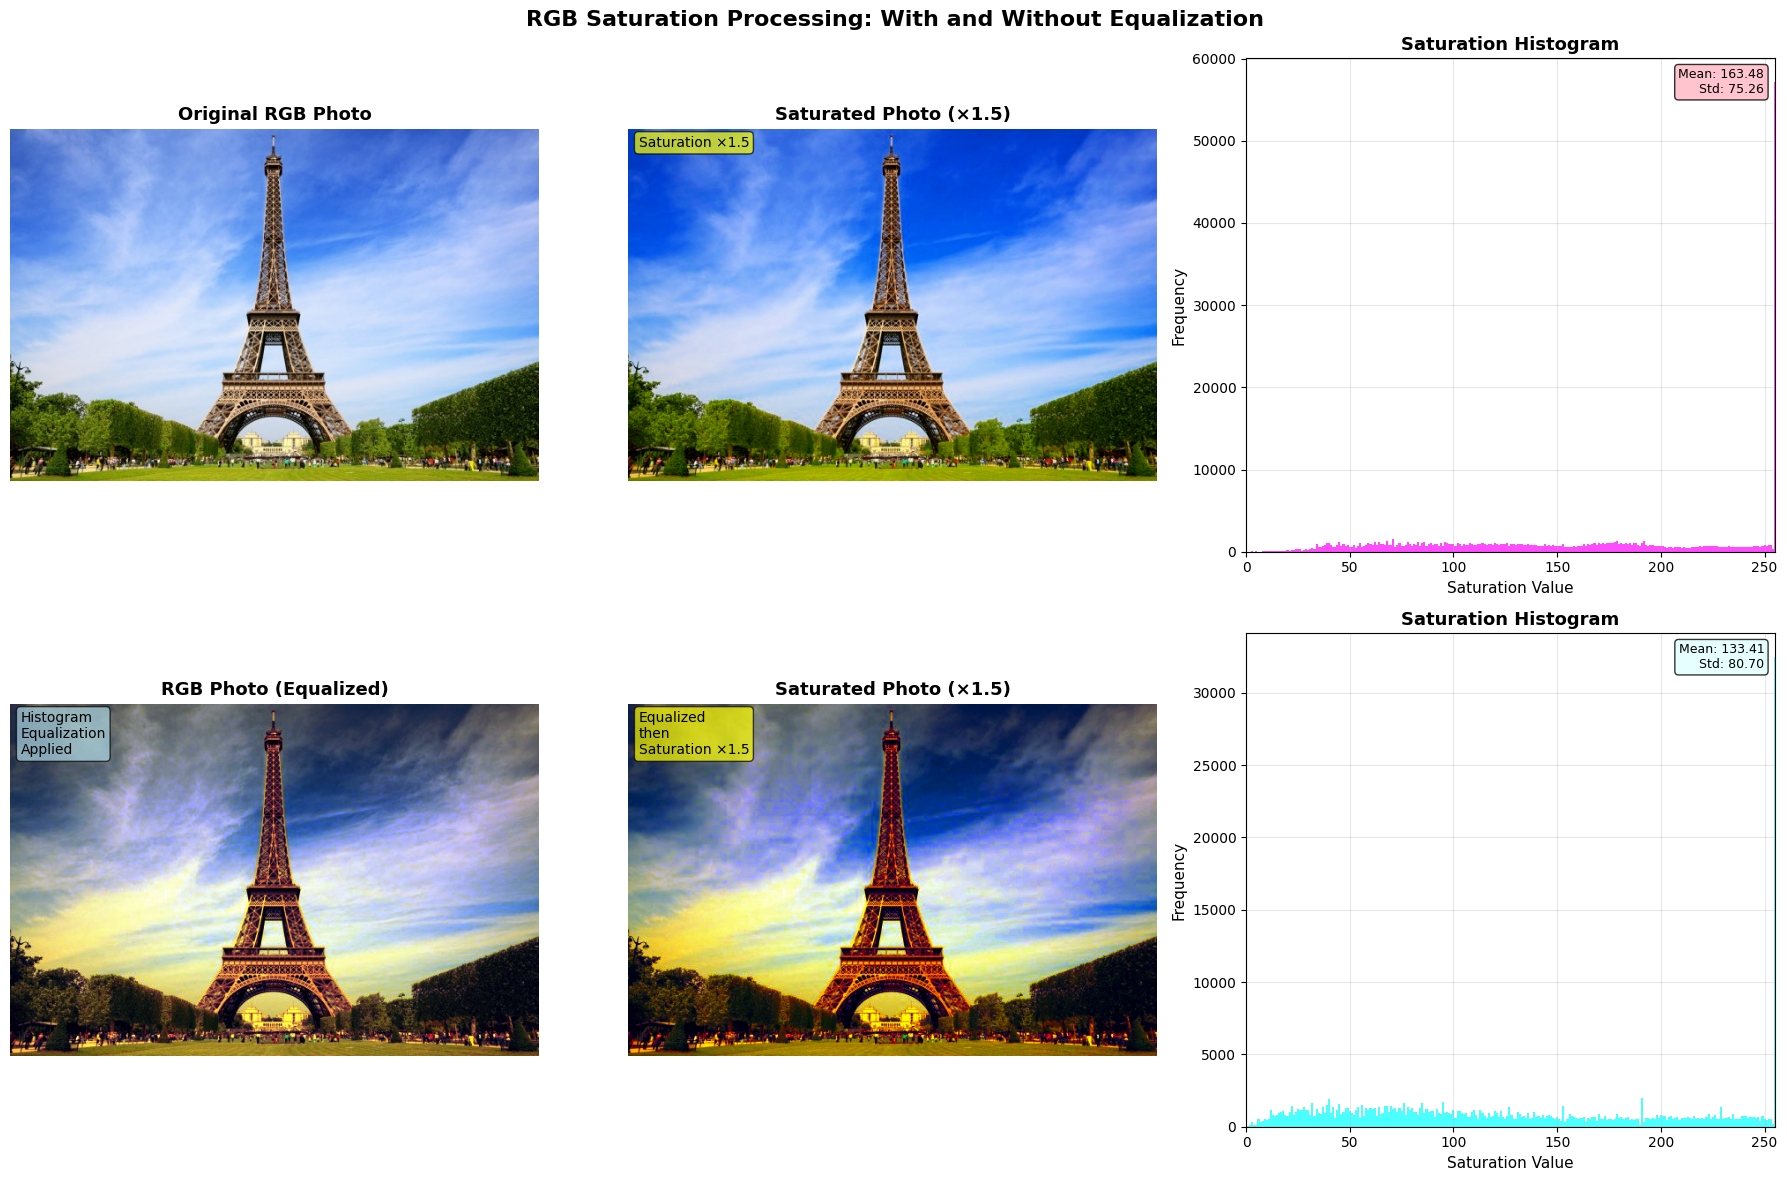


Image size: 600 x 400
Saturation factor: 1.5

Processing complete!


In [37]:

image_path = './img/eyfel.jpg'  
original_image = Image.open(image_path)


if original_image.mode != 'RGB':
    original_image = original_image.convert('RGB')

rgb_array = np.array(original_image)
height, width = rgb_array.shape[:2]

rgb_normalized = rgb_array / 255.0
hsv_array = np.zeros_like(rgb_normalized)
for i in range(height):
    for j in range(width):
        r, g, b = rgb_normalized[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        hsv_array[i, j] = [h, s, v]

saturation_factor = 1.5
hsv_saturated = hsv_array.copy()
hsv_saturated[:, :, 1] = np.clip(hsv_array[:, :, 1] * saturation_factor, 0, 1)

rgb_saturated = np.zeros_like(rgb_normalized)
for i in range(height):
    for j in range(width):
        h, s, v = hsv_saturated[i, j]
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        rgb_saturated[i, j] = [r, g, b]

rgb_saturated = (rgb_saturated * 255).astype(np.uint8)

saturation_channel = (hsv_saturated[:, :, 1] * 255).astype(np.uint8)
hist_saturation, _ = np.histogram(saturation_channel.flatten(), bins=256, range=(0, 256))




rgb_equalized = np.zeros_like(rgb_array)
for channel in range(3):
    hist_ch, _ = np.histogram(rgb_array[:, :, channel].flatten(), bins=256, range=(0, 256))
    cdf_ch = np.cumsum(hist_ch)
    cdf_ch_normalized = (cdf_ch / cdf_ch[-1] * 255).astype(np.uint8)
    rgb_equalized[:, :, channel] = cdf_ch_normalized[rgb_array[:, :, channel]]

rgb_eq_normalized = rgb_equalized / 255.0
hsv_eq_array = np.zeros_like(rgb_eq_normalized)
for i in range(height):
    for j in range(width):
        r, g, b = rgb_eq_normalized[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        hsv_eq_array[i, j] = [h, s, v]

hsv_eq_saturated = hsv_eq_array.copy()
hsv_eq_saturated[:, :, 1] = np.clip(hsv_eq_array[:, :, 1] * saturation_factor, 0, 1)


rgb_eq_saturated = np.zeros_like(rgb_eq_normalized)
for i in range(height):
    for j in range(width):
        h, s, v = hsv_eq_saturated[i, j]
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        rgb_eq_saturated[i, j] = [r, g, b]

rgb_eq_saturated = (rgb_eq_saturated * 255).astype(np.uint8)

saturation_eq_channel = (hsv_eq_saturated[:, :, 1] * 255).astype(np.uint8)
hist_saturation_eq, _ = np.histogram(saturation_eq_channel.flatten(), bins=256, range=(0, 256))


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('RGB Saturation Processing: With and Without Equalization', fontsize=16, fontweight='bold')

axes[0, 0].imshow(original_image)
axes[0, 0].set_title('Original RGB Photo', fontsize=13, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(rgb_saturated)
axes[0, 1].set_title(f'Saturated Photo (×{saturation_factor})', fontsize=13, fontweight='bold')
axes[0, 1].axis('off')
sat_text = f'Saturation ×{saturation_factor}'
axes[0, 1].text(0.02, 0.98, sat_text, transform=axes[0, 1].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

axes[0, 2].bar(range(256), hist_saturation, width=1.0, color='magenta', alpha=0.7)
axes[0, 2].set_title('Saturation Histogram', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Saturation Value', fontsize=11)
axes[0, 2].set_ylabel('Frequency', fontsize=11)
axes[0, 2].set_xlim([0, 255])
axes[0, 2].grid(True, alpha=0.3)
stats_sat = f'Mean: {np.mean(saturation_channel):.2f}\nStd: {np.std(saturation_channel):.2f}'
axes[0, 2].text(0.98, 0.98, stats_sat, transform=axes[0, 2].transAxes, fontsize=9,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='lightpink', alpha=0.8))

axes[1, 0].imshow(rgb_equalized)
axes[1, 0].set_title('RGB Photo (Equalized)', fontsize=13, fontweight='bold')
axes[1, 0].axis('off')
eq_label = 'Histogram\nEqualization\nApplied'
axes[1, 0].text(0.02, 0.98, eq_label, transform=axes[1, 0].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

axes[1, 1].imshow(rgb_eq_saturated)
axes[1, 1].set_title(f'Saturated Photo (×{saturation_factor})', fontsize=13, fontweight='bold')
axes[1, 1].axis('off')
sat_eq_text = f'Equalized\nthen\nSaturation ×{saturation_factor}'
axes[1, 1].text(0.02, 0.98, sat_eq_text, transform=axes[1, 1].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

axes[1, 2].bar(range(256), hist_saturation_eq, width=1.0, color='cyan', alpha=0.7)
axes[1, 2].set_title('Saturation Histogram', fontsize=13, fontweight='bold')
axes[1, 2].set_xlabel('Saturation Value', fontsize=11)
axes[1, 2].set_ylabel('Frequency', fontsize=11)
axes[1, 2].set_xlim([0, 255])
axes[1, 2].grid(True, alpha=0.3)
stats_sat_eq = f'Mean: {np.mean(saturation_eq_channel):.2f}\nStd: {np.std(saturation_eq_channel):.2f}'
axes[1, 2].text(0.98, 0.98, stats_sat_eq, transform=axes[1, 2].transAxes, fontsize=9,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
plt.show()


print(f"\nImage size: {width} x {height}")
print(f"Saturation factor: {saturation_factor}")
print("\nProcessing complete!")

# **Histogram Experiment**
**Step 1: Original image loaded**

**Step 2: Applying histogram equalization**

**Step 3: Applying inverse equalization**


IMAGE PROCESSING PIPELINE
Image size: 275 x 183

Step 1: Original RGB image loaded
Step 2: Applying histogram equalization...
  Histogram equalization applied to R, G, B channels
Step 3: Applying inverse equalization...
  Inverse equalization applied (attempting to recover original)
Step 4: Final processed image ready


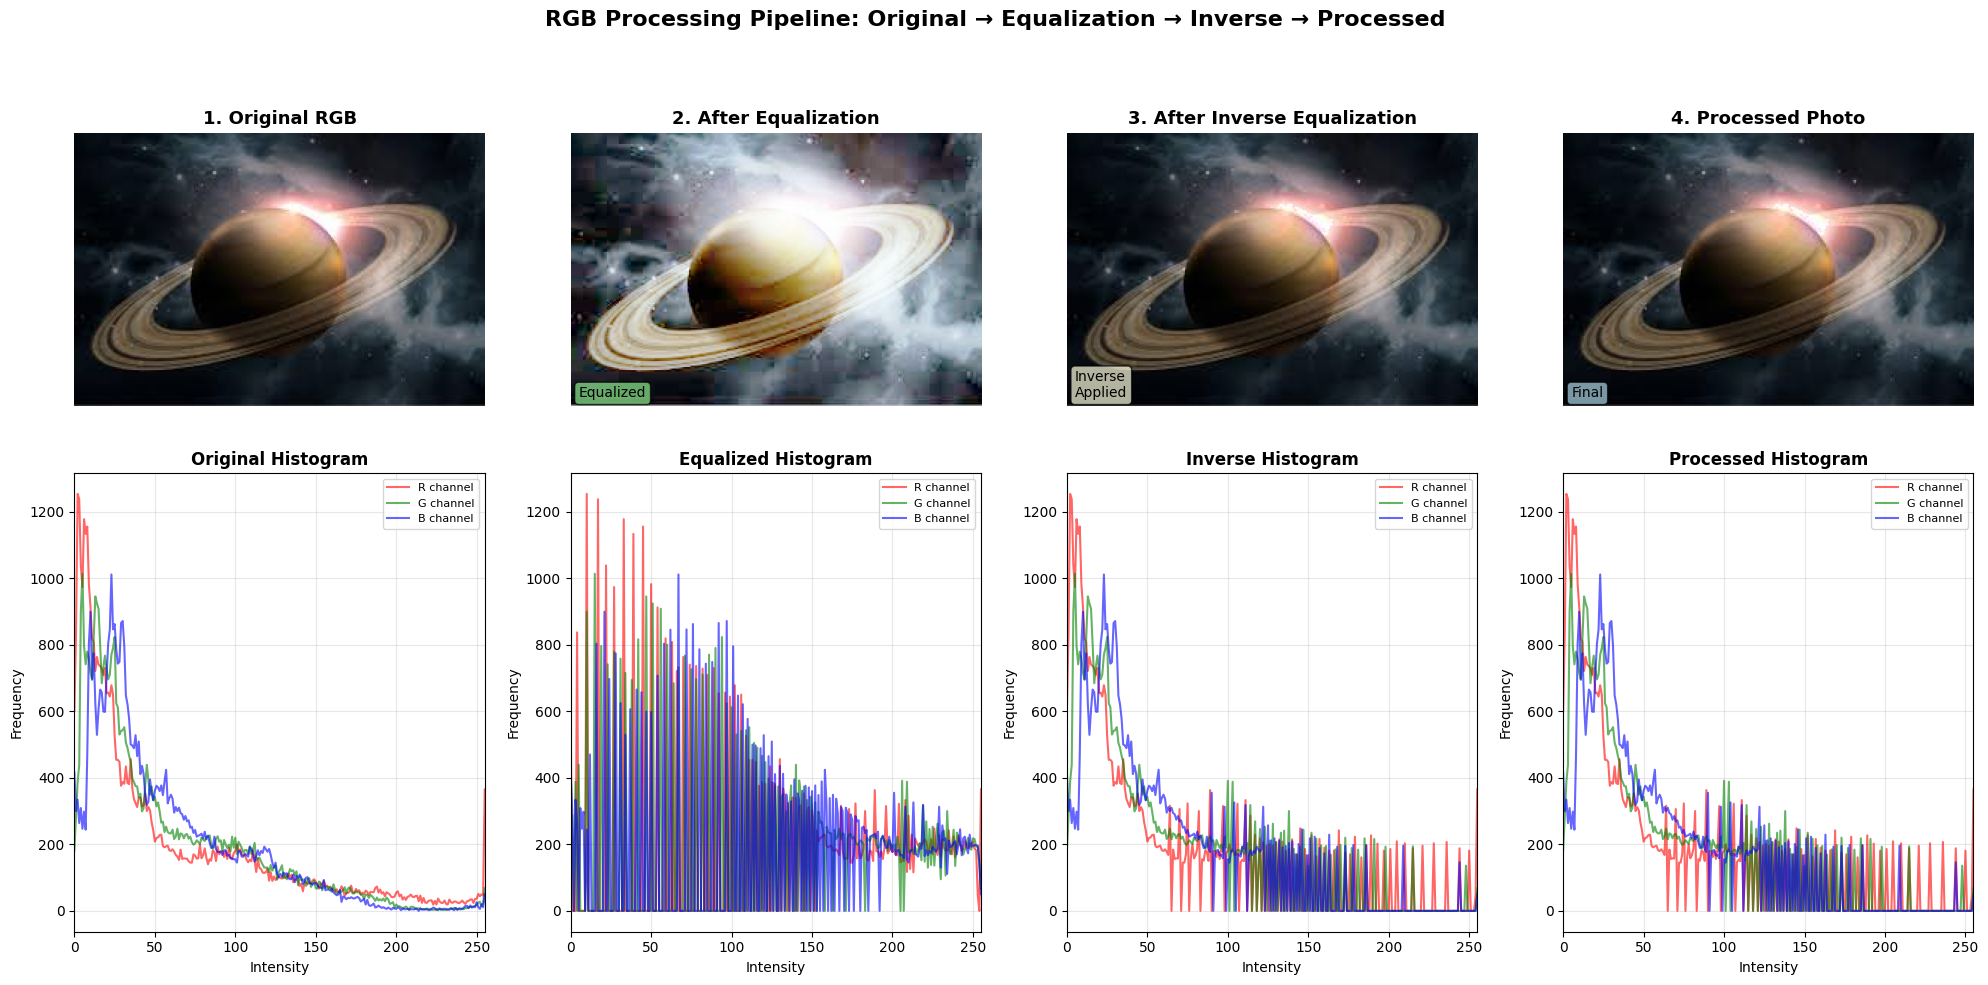


PROCESSING STATISTICS

1. Original RGB:
   R: mean=58.60, std=61.36
   G: mean=56.21, std=50.10
   B: mean=56.13, std=45.68

2. After Equalization:
   R: mean=126.78, std=73.54
   G: mean=127.69, std=73.15
   B: mean=127.11, std=73.71

3. After Inverse Equalization:
   R: mean=58.39, std=60.94
   G: mean=55.99, std=49.53
   B: mean=55.92, std=45.06

4. Processed Photo:
   R: mean=58.39, std=60.94
   G: mean=55.99, std=49.53
   B: mean=55.92, std=45.06
Processing complete!


In [40]:

image_path = './img/saturn.jpeg' 
original_image = Image.open(image_path)


if original_image.mode != 'RGB':
    original_image = original_image.convert('RGB')

rgb_array = np.array(original_image)
height, width = rgb_array.shape[:2]

print("=" * 70)
print("IMAGE PROCESSING PIPELINE")
print("=" * 70)
print(f"Image size: {width} x {height}")

print("\nStep 1: Original RGB image loaded")

print("Step 2: Applying histogram equalization...")

equalized_rgb = np.zeros_like(rgb_array)
cdf_functions = []

for channel in range(3):

    hist, bins = np.histogram(rgb_array[:, :, channel].flatten(), bins=256, range=(0, 256))

    cdf = np.cumsum(hist)

    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype(np.uint8)

    cdf_functions.append(cdf_normalized)

    equalized_rgb[:, :, channel] = cdf_normalized[rgb_array[:, :, channel]]

print("  Histogram equalization applied to R, G, B channels")

print("Step 3: Applying inverse equalization...")

inverse_equalized_rgb = np.zeros_like(equalized_rgb)

for channel in range(3):

    cdf_func = cdf_functions[channel]

    inverse_lut = np.zeros(256, dtype=np.uint8)
    
    for equalized_val in range(256):
        original_val = np.argmin(np.abs(cdf_func - equalized_val))
        inverse_lut[equalized_val] = original_val

    inverse_equalized_rgb[:, :, channel] = inverse_lut[equalized_rgb[:, :, channel]]

print("  Inverse equalization applied (attempting to recover original)")

processed_rgb = inverse_equalized_rgb.copy()

print("Step 4: Final processed image ready")

hist_orig_r = np.histogram(rgb_array[:,:,0].flatten(), bins=256, range=(0,256))[0]
hist_orig_g = np.histogram(rgb_array[:,:,1].flatten(), bins=256, range=(0,256))[0]
hist_orig_b = np.histogram(rgb_array[:,:,2].flatten(), bins=256, range=(0,256))[0]

hist_eq_r = np.histogram(equalized_rgb[:,:,0].flatten(), bins=256, range=(0,256))[0]
hist_eq_g = np.histogram(equalized_rgb[:,:,1].flatten(), bins=256, range=(0,256))[0]
hist_eq_b = np.histogram(equalized_rgb[:,:,2].flatten(), bins=256, range=(0,256))[0]

hist_inv_r = np.histogram(inverse_equalized_rgb[:,:,0].flatten(), bins=256, range=(0,256))[0]
hist_inv_g = np.histogram(inverse_equalized_rgb[:,:,1].flatten(), bins=256, range=(0,256))[0]
hist_inv_b = np.histogram(inverse_equalized_rgb[:,:,2].flatten(), bins=256, range=(0,256))[0]

hist_proc_r = np.histogram(processed_rgb[:,:,0].flatten(), bins=256, range=(0,256))[0]
hist_proc_g = np.histogram(processed_rgb[:,:,1].flatten(), bins=256, range=(0,256))[0]
hist_proc_b = np.histogram(processed_rgb[:,:,2].flatten(), bins=256, range=(0,256))[0]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('RGB Processing Pipeline: Original → Equalization → Inverse → Processed', 
             fontsize=16, fontweight='bold')

axes[0, 0].imshow(rgb_array)
axes[0, 0].set_title('1. Original RGB', fontsize=13, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized_rgb)
axes[0, 1].set_title('2. After Equalization', fontsize=13, fontweight='bold')
axes[0, 1].axis('off')
axes[0, 1].text(0.02, 0.02, 'Equalized', transform=axes[0, 1].transAxes, fontsize=10,
                verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

axes[0, 2].imshow(inverse_equalized_rgb)
axes[0, 2].set_title('3. After Inverse Equalization', fontsize=13, fontweight='bold')
axes[0, 2].axis('off')
axes[0, 2].text(0.02, 0.02, 'Inverse\nApplied', transform=axes[0, 2].transAxes, fontsize=10,
                verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

axes[0, 3].imshow(processed_rgb)
axes[0, 3].set_title('4. Processed Photo', fontsize=13, fontweight='bold')
axes[0, 3].axis('off')
axes[0, 3].text(0.02, 0.02, 'Final', transform=axes[0, 3].transAxes, fontsize=10,
                verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

colors = ['red', 'green', 'blue']
labels = ['R', 'G', 'B']

for i, (hist, color, label) in enumerate(zip([hist_orig_r, hist_orig_g, hist_orig_b], colors, labels)):
    axes[1, 0].plot(range(256), hist, color=color, alpha=0.6, linewidth=1.5, label=f'{label} channel')
axes[1, 0].set_title('Original Histogram', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Intensity', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].set_xlim([0, 255])
axes[1, 0].legend(fontsize=8)
axes[1, 0].grid(True, alpha=0.3)

for i, (hist, color, label) in enumerate(zip([hist_eq_r, hist_eq_g, hist_eq_b], colors, labels)):
    axes[1, 1].plot(range(256), hist, color=color, alpha=0.6, linewidth=1.5, label=f'{label} channel')
axes[1, 1].set_title('Equalized Histogram', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Intensity', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].set_xlim([0, 255])
axes[1, 1].legend(fontsize=8)
axes[1, 1].grid(True, alpha=0.3)

for i, (hist, color, label) in enumerate(zip([hist_inv_r, hist_inv_g, hist_inv_b], colors, labels)):
    axes[1, 2].plot(range(256), hist, color=color, alpha=0.6, linewidth=1.5, label=f'{label} channel')
axes[1, 2].set_title('Inverse Histogram', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Intensity', fontsize=10)
axes[1, 2].set_ylabel('Frequency', fontsize=10)
axes[1, 2].set_xlim([0, 255])
axes[1, 2].legend(fontsize=8)
axes[1, 2].grid(True, alpha=0.3)

for i, (hist, color, label) in enumerate(zip([hist_proc_r, hist_proc_g, hist_proc_b], colors, labels)):
    axes[1, 3].plot(range(256), hist, color=color, alpha=0.6, linewidth=1.5, label=f'{label} channel')
axes[1, 3].set_title('Processed Histogram', fontsize=12, fontweight='bold')
axes[1, 3].set_xlabel('Intensity', fontsize=10)
axes[1, 3].set_ylabel('Frequency', fontsize=10)
axes[1, 3].set_xlim([0, 255])
axes[1, 3].legend(fontsize=8)
axes[1, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("PROCESSING STATISTICS")
print("=" * 70)

print("\n1. Original RGB:")
print(f"   R: mean={np.mean(rgb_array[:,:,0]):.2f}, std={np.std(rgb_array[:,:,0]):.2f}")
print(f"   G: mean={np.mean(rgb_array[:,:,1]):.2f}, std={np.std(rgb_array[:,:,1]):.2f}")
print(f"   B: mean={np.mean(rgb_array[:,:,2]):.2f}, std={np.std(rgb_array[:,:,2]):.2f}")

print("\n2. After Equalization:")
print(f"   R: mean={np.mean(equalized_rgb[:,:,0]):.2f}, std={np.std(equalized_rgb[:,:,0]):.2f}")
print(f"   G: mean={np.mean(equalized_rgb[:,:,1]):.2f}, std={np.std(equalized_rgb[:,:,1]):.2f}")
print(f"   B: mean={np.mean(equalized_rgb[:,:,2]):.2f}, std={np.std(equalized_rgb[:,:,2]):.2f}")

print("\n3. After Inverse Equalization:")
print(f"   R: mean={np.mean(inverse_equalized_rgb[:,:,0]):.2f}, std={np.std(inverse_equalized_rgb[:,:,0]):.2f}")
print(f"   G: mean={np.mean(inverse_equalized_rgb[:,:,1]):.2f}, std={np.std(inverse_equalized_rgb[:,:,1]):.2f}")
print(f"   B: mean={np.mean(inverse_equalized_rgb[:,:,2]):.2f}, std={np.std(inverse_equalized_rgb[:,:,2]):.2f}")

print("\n4. Processed Photo:")
print(f"   R: mean={np.mean(processed_rgb[:,:,0]):.2f}, std={np.std(processed_rgb[:,:,0]):.2f}")
print(f"   G: mean={np.mean(processed_rgb[:,:,1]):.2f}, std={np.std(processed_rgb[:,:,1]):.2f}")
print(f"   B: mean={np.mean(processed_rgb[:,:,2]):.2f}, std={np.std(processed_rgb[:,:,2]):.2f}")


print("Processing complete!")


# **Arithmetic Operations**
**Addition, Subtraction, Division, Multiplication**

**Addition & subtraction: adjusting the brightness of the image**
 **** **a : random pixel value**

 **Subtraction : motion detection**
**Division, Multiplication : adjust the contrast of the image**

**Image Subtraction and Change Detection**

IMAGE ARITHMETIC OPERATIONS
Image 1 shape: (1024, 1024)
Image 2 shape: (1024, 1024)

ADDITION:
  Result range: [2, 255]
  Blended (50-50) range: [1, 251]

SUBTRACTION:
  Direct subtraction range: [0, 251]
  Absolute difference range: [0, 252]
  Enhanced difference range: [0, 255]

CHANGE DETECTION:
  Threshold: 30
  Changed pixels: 884155 (84.32%)
  Unchanged pixels: 164421 (15.68%)

MULTIPLICATION:
  Result range: [0, 247]

DIVISION:
  Result range: [0, 255]


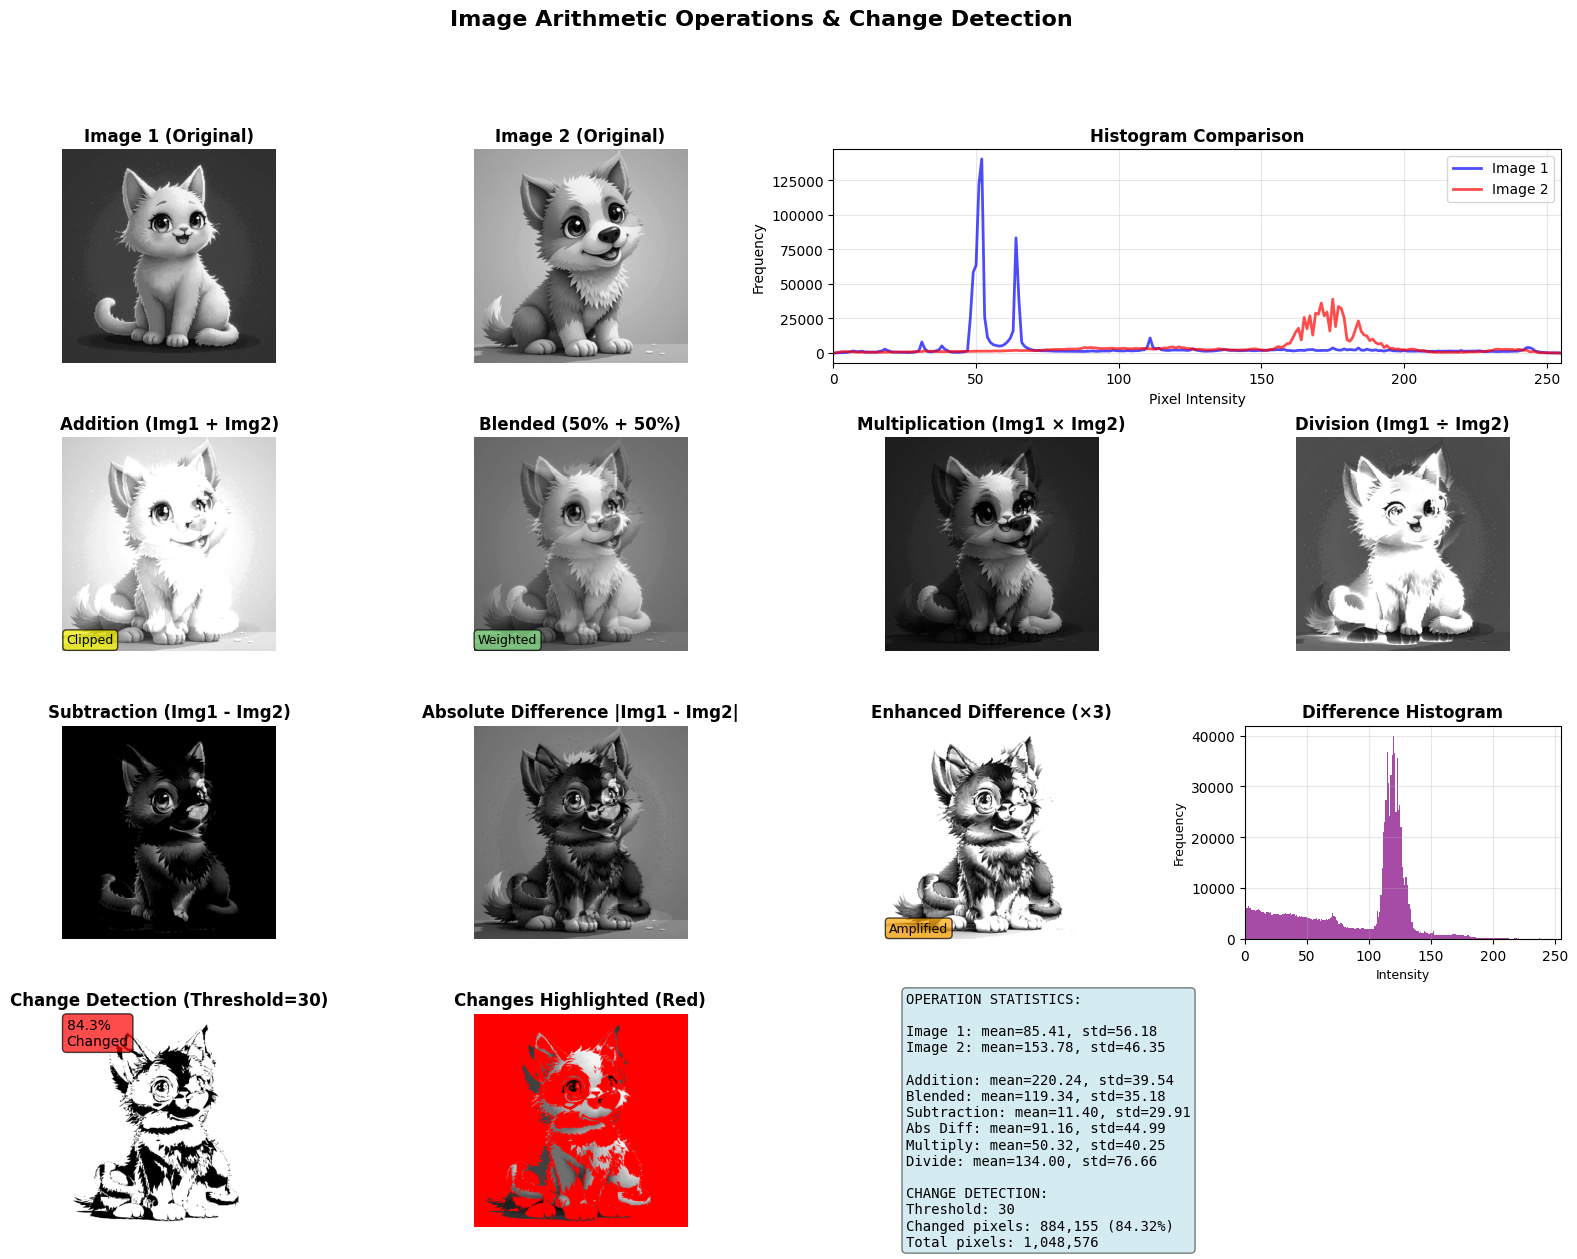


Processing complete!


In [42]:
image_path1 = './img/300cat (1).jpeg'  
image_path2 = './img/300dog (1).jpeg' 

image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

if image1.mode != 'L':
    image1 = image1.convert('L')
if image2.mode != 'L':
    image2 = image2.convert('L')

if image1.size != image2.size:
    image2 = image2.resize(image1.size)
    print(f"Image 2 resized to match Image 1: {image1.size}")

img1_array = np.array(image1, dtype=np.float32)
img2_array = np.array(image2, dtype=np.float32)

print("=" * 70)
print("IMAGE ARITHMETIC OPERATIONS")
print("=" * 70)
print(f"Image 1 shape: {img1_array.shape}")
print(f"Image 2 shape: {img2_array.shape}")

added_image = np.clip(img1_array + img2_array, 0, 255).astype(np.uint8)

blended_image = np.clip((img1_array * 0.5 + img2_array * 0.5), 0, 255).astype(np.uint8)

print("\nADDITION:")
print(f"  Result range: [{np.min(added_image)}, {np.max(added_image)}]")
print(f"  Blended (50-50) range: [{np.min(blended_image)}, {np.max(blended_image)}]")

subtracted_image = np.clip(img1_array - img2_array, 0, 255).astype(np.uint8)

abs_diff_image = np.abs(img1_array - img2_array).astype(np.uint8)

enhanced_diff = np.clip(np.abs(img1_array - img2_array) * 3, 0, 255).astype(np.uint8)

print("\nSUBTRACTION:")
print(f"  Direct subtraction range: [{np.min(subtracted_image)}, {np.max(subtracted_image)}]")
print(f"  Absolute difference range: [{np.min(abs_diff_image)}, {np.max(abs_diff_image)}]")
print(f"  Enhanced difference range: [{np.min(enhanced_diff)}, {np.max(enhanced_diff)}]")

threshold = 30
change_mask = abs_diff_image > threshold
change_detection = (change_mask * 255).astype(np.uint8)
changed_pixels = np.sum(change_mask)
total_pixels = change_mask.size
change_percentage = (changed_pixels / total_pixels) * 100

print("\nCHANGE DETECTION:")
print(f"  Threshold: {threshold}")
print(f"  Changed pixels: {changed_pixels} ({change_percentage:.2f}%)")
print(f"  Unchanged pixels: {total_pixels - changed_pixels} ({100-change_percentage:.2f}%)")

multiplied_image = np.clip((img1_array * img2_array) / 255, 0, 255).astype(np.uint8)

print("\nMULTIPLICATION:")
print(f"  Result range: [{np.min(multiplied_image)}, {np.max(multiplied_image)}]")

with np.errstate(divide='ignore', invalid='ignore'):
    divided_image = np.where(img2_array != 0, 
                             np.clip((img1_array / img2_array) * 255, 0, 255), 
                             0).astype(np.uint8)

print("\nDIVISION:")
print(f"  Result range: [{np.min(divided_image)}, {np.max(divided_image)}]")

hist_img1 = np.histogram(img1_array.flatten(), bins=256, range=(0, 256))[0]
hist_img2 = np.histogram(img2_array.flatten(), bins=256, range=(0, 256))[0]
hist_added = np.histogram(added_image.flatten(), bins=256, range=(0, 256))[0]
hist_subtracted = np.histogram(abs_diff_image.flatten(), bins=256, range=(0, 256))[0]

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(4, 4, hspace=0.35, wspace=0.3)


ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(image1, cmap='gray')
ax1.set_title('Image 1 (Original)', fontsize=12, fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(image2, cmap='gray')
ax2.set_title('Image 2 (Original)', fontsize=12, fontweight='bold')
ax2.axis('off')

# Histogram comparison
ax3 = fig.add_subplot(gs[0, 2:])
ax3.plot(range(256), hist_img1, color='blue', alpha=0.7, linewidth=2, label='Image 1')
ax3.plot(range(256), hist_img2, color='red', alpha=0.7, linewidth=2, label='Image 2')
ax3.set_title('Histogram Comparison', fontsize=12, fontweight='bold')
ax3.set_xlabel('Pixel Intensity', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim([0, 255])

ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(added_image, cmap='gray')
ax4.set_title('Addition (Img1 + Img2)', fontsize=12, fontweight='bold')
ax4.axis('off')
ax4.text(0.02, 0.02, 'Clipped', transform=ax4.transAxes, fontsize=9,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax5 = fig.add_subplot(gs[1, 1])
ax5.imshow(blended_image, cmap='gray')
ax5.set_title('Blended (50% + 50%)', fontsize=12, fontweight='bold')
ax5.axis('off')
ax5.text(0.02, 0.02, 'Weighted', transform=ax5.transAxes, fontsize=9,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax6 = fig.add_subplot(gs[1, 2])
ax6.imshow(multiplied_image, cmap='gray')
ax6.set_title('Multiplication (Img1 × Img2)', fontsize=12, fontweight='bold')
ax6.axis('off')

ax7 = fig.add_subplot(gs[1, 3])
ax7.imshow(divided_image, cmap='gray')
ax7.set_title('Division (Img1 ÷ Img2)', fontsize=12, fontweight='bold')
ax7.axis('off')

ax8 = fig.add_subplot(gs[2, 0])
ax8.imshow(subtracted_image, cmap='gray')
ax8.set_title('Subtraction (Img1 - Img2)', fontsize=12, fontweight='bold')
ax8.axis('off')

ax9 = fig.add_subplot(gs[2, 1])
ax9.imshow(abs_diff_image, cmap='gray')
ax9.set_title('Absolute Difference |Img1 - Img2|', fontsize=12, fontweight='bold')
ax9.axis('off')

ax10 = fig.add_subplot(gs[2, 2])
ax10.imshow(enhanced_diff, cmap='gray')
ax10.set_title('Enhanced Difference (×3)', fontsize=12, fontweight='bold')
ax10.axis('off')
ax10.text(0.02, 0.02, 'Amplified', transform=ax10.transAxes, fontsize=9,
          verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='orange', alpha=0.7))

ax11 = fig.add_subplot(gs[2, 3])
ax11.bar(range(256), hist_subtracted, width=1.0, color='purple', alpha=0.7)
ax11.set_title('Difference Histogram', fontsize=12, fontweight='bold')
ax11.set_xlabel('Intensity', fontsize=9)
ax11.set_ylabel('Frequency', fontsize=9)
ax11.set_xlim([0, 255])
ax11.grid(True, alpha=0.3)

ax12 = fig.add_subplot(gs[3, 0])
ax12.imshow(change_detection, cmap='gray')
ax12.set_title(f'Change Detection (Threshold={threshold})', fontsize=12, fontweight='bold')
ax12.axis('off')
change_text = f'{change_percentage:.1f}%\nChanged'
ax12.text(0.02, 0.98, change_text, transform=ax12.transAxes, fontsize=10,
          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.7))


ax13 = fig.add_subplot(gs[3, 1])
overlay = np.stack([img1_array, img1_array, img1_array], axis=2).astype(np.uint8)
overlay[change_mask, 0] = 255  # Red channel for changes
overlay[change_mask, 1] = 0
overlay[change_mask, 2] = 0
ax13.imshow(overlay)
ax13.set_title('Changes Highlighted (Red)', fontsize=12, fontweight='bold')
ax13.axis('off')


ax14 = fig.add_subplot(gs[3, 2:])
ax14.axis('off')
stats_text = "OPERATION STATISTICS:\n\n"
stats_text += f"Image 1: mean={np.mean(img1_array):.2f}, std={np.std(img1_array):.2f}\n"
stats_text += f"Image 2: mean={np.mean(img2_array):.2f}, std={np.std(img2_array):.2f}\n\n"
stats_text += f"Addition: mean={np.mean(added_image):.2f}, std={np.std(added_image):.2f}\n"
stats_text += f"Blended: mean={np.mean(blended_image):.2f}, std={np.std(blended_image):.2f}\n"
stats_text += f"Subtraction: mean={np.mean(subtracted_image):.2f}, std={np.std(subtracted_image):.2f}\n"
stats_text += f"Abs Diff: mean={np.mean(abs_diff_image):.2f}, std={np.std(abs_diff_image):.2f}\n"
stats_text += f"Multiply: mean={np.mean(multiplied_image):.2f}, std={np.std(multiplied_image):.2f}\n"
stats_text += f"Divide: mean={np.mean(divided_image):.2f}, std={np.std(divided_image):.2f}\n\n"
stats_text += f"CHANGE DETECTION:\n"
stats_text += f"Threshold: {threshold}\n"
stats_text += f"Changed pixels: {changed_pixels:,} ({change_percentage:.2f}%)\n"
stats_text += f"Total pixels: {total_pixels:,}"

ax14.text(0.1, 0.5, stats_text, fontsize=10, family='monospace',
          verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.suptitle('Image Arithmetic Operations & Change Detection', fontsize=16, fontweight='bold')
plt.show()

print("\n" + "=" * 70)
print("Processing complete!")
print("=" * 70)

```NOT operations
XOR operations
Bitwise XOR(eXclusive OR) operation
AND operations
Bitwise AND operation
OR operations
Bitwise OR operation```

BITWISE OPERATIONS ON IMAGES
Image shape: (1024, 1024)

NOT OPERATION:
  Formula: new_pixel = 255 - old_pixel
  Result range: [0, 255]

XOR OPERATIONS:
  XOR with 128:
    Result range: [0, 255]
  XOR with 255 (equivalent to NOT):
    Result range: [0, 255]
  XOR sets same bits to 0, different bits to 1

AND OPERATIONS:
  AND with Image 2:
    Result range: [0, 210]
  AND with 128:
    Result range: [0, 128]
  AND keeps only bits that are 1 in both operands

OR OPERATIONS:
  OR with Image 2:
    Result range: [32, 255]
  OR with 128:
    Result range: [128, 255]
  OR sets bit to 1 if either operand has 1


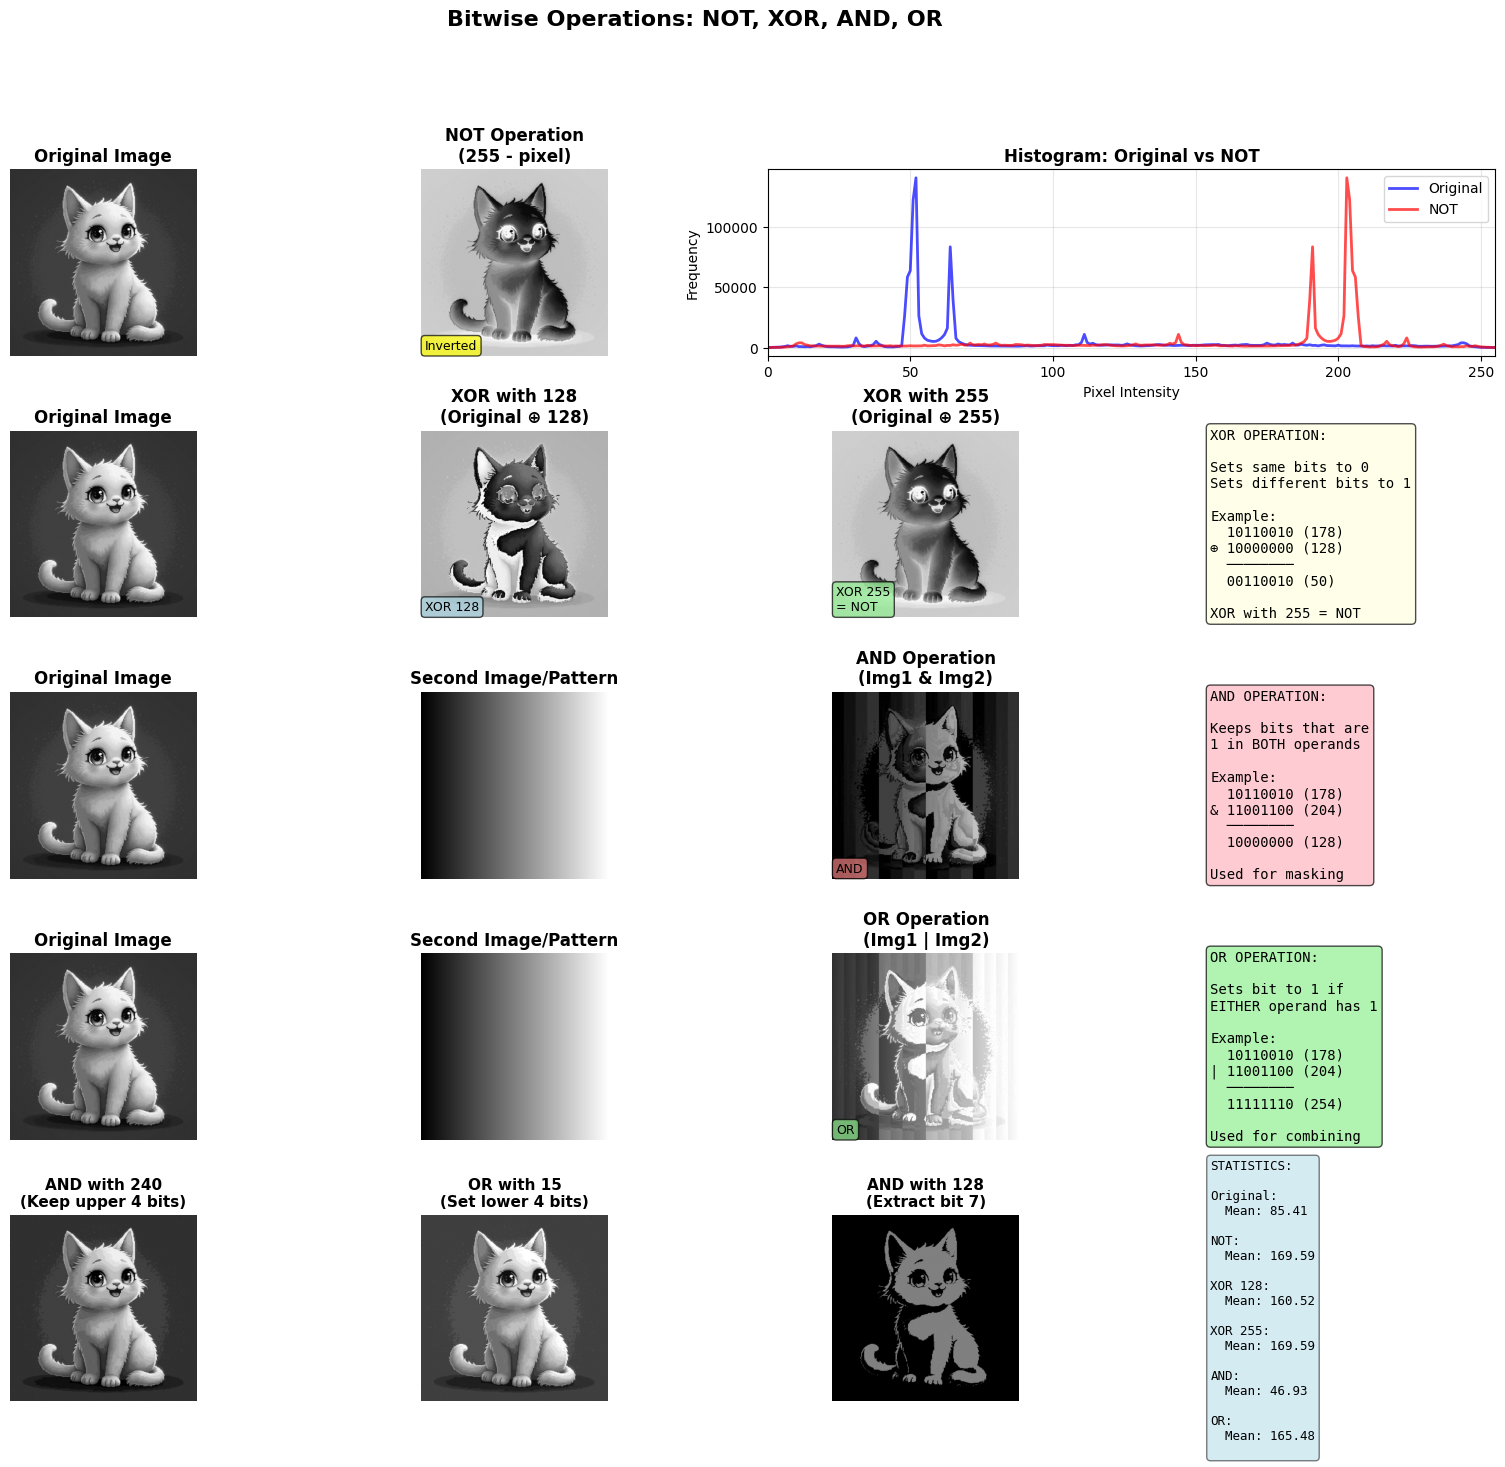


OPERATION SUMMARY

1. NOT Operation (255 - pixel):
   Inverts all bits, creates negative image
   Mean: 169.59

2. XOR with 128:
   Flips bit 7 (128 = 10000000)
   Mean: 160.52

3. XOR with 255:
   Equivalent to NOT operation
   Mean: 169.59

4. AND Operation:
   Keeps only common bits between images
   Mean: 46.93

5. OR Operation:
   Combines bits from both images
   Mean: 165.48

Processing complete!


In [ ]:

image_path = './img/cat.jpeg' 
original_image = Image.open(image_path)

if original_image.mode != 'L':
    original_image = original_image.convert('L')

img_array = np.array(original_image, dtype=np.uint8)

image_path2 = './img/dog.jpeg'
image2 = Image.open(image_path2)
if image2.mode != 'L':
    image2 = image2.convert('L')
if image2.size != original_image.size:
    image2 = image2.resize(original_image.size)
img2_array = np.array(image2, dtype=np.uint8)

height, width = img_array.shape
pattern = np.tile(np.linspace(0, 255, width, dtype=np.uint8), (height, 1))
img2_array = pattern.astype(np.uint8)

print("=" * 70)
print("BITWISE OPERATIONS ON IMAGES")
print("=" * 70)
print(f"Image shape: {img_array.shape}")

not_image = 255 - img_array

print("\nNOT OPERATION:")
print("  Formula: new_pixel = 255 - old_pixel")
print(f"  Result range: [{np.min(not_image)}, {np.max(not_image)}]")

xor_128 = np.bitwise_xor(img_array, 128)

xor_255 = np.bitwise_xor(img_array, 255)

print("\nXOR OPERATIONS:")
print("  XOR with 128:")
print(f"    Result range: [{np.min(xor_128)}, {np.max(xor_128)}]")
print("  XOR with 255 (equivalent to NOT):")
print(f"    Result range: [{np.min(xor_255)}, {np.max(xor_255)}]")
print("  XOR sets same bits to 0, different bits to 1")


and_image = np.bitwise_and(img_array, img2_array)

and_128 = np.bitwise_and(img_array, 128)
and_240 = np.bitwise_and(img_array, 240)  

print("\nAND OPERATIONS:")
print("  AND with Image 2:")
print(f"    Result range: [{np.min(and_image)}, {np.max(and_image)}]")
print("  AND with 128:")
print(f"    Result range: [{np.min(and_128)}, {np.max(and_128)}]")
print("  AND keeps only bits that are 1 in both operands")


or_image = np.bitwise_or(img_array, img2_array)

or_128 = np.bitwise_or(img_array, 128)
or_15 = np.bitwise_or(img_array, 15)  
print("\nOR OPERATIONS:")
print("  OR with Image 2:")
print(f"    Result range: [{np.min(or_image)}, {np.max(or_image)}]")
print("  OR with 128:")
print(f"    Result range: [{np.min(or_128)}, {np.max(or_128)}]")
print("  OR sets bit to 1 if either operand has 1")

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(5, 4, hspace=0.4, wspace=0.3)


ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img_array, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image', fontsize=12, fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(not_image, cmap='gray', vmin=0, vmax=255)
ax2.set_title('NOT Operation\n(255 - pixel)', fontsize=12, fontweight='bold')
ax2.axis('off')
ax2.text(0.02, 0.02, 'Inverted', transform=ax2.transAxes, fontsize=9,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax3 = fig.add_subplot(gs[0, 2:])
hist_orig = np.histogram(img_array.flatten(), bins=256, range=(0, 256))[0]
hist_not = np.histogram(not_image.flatten(), bins=256, range=(0, 256))[0]
ax3.plot(range(256), hist_orig, color='blue', alpha=0.7, linewidth=2, label='Original')
ax3.plot(range(256), hist_not, color='red', alpha=0.7, linewidth=2, label='NOT')
ax3.set_title('Histogram: Original vs NOT', fontsize=12, fontweight='bold')
ax3.set_xlabel('Pixel Intensity', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim([0, 255])

ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(img_array, cmap='gray', vmin=0, vmax=255)
ax4.set_title('Original Image', fontsize=12, fontweight='bold')
ax4.axis('off')

ax5 = fig.add_subplot(gs[1, 1])
ax5.imshow(xor_128, cmap='gray', vmin=0, vmax=255)
ax5.set_title('XOR with 128\n(Original ⊕ 128)', fontsize=12, fontweight='bold')
ax5.axis('off')
ax5.text(0.02, 0.02, 'XOR 128', transform=ax5.transAxes, fontsize=9,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

ax6 = fig.add_subplot(gs[1, 2])
ax6.imshow(xor_255, cmap='gray', vmin=0, vmax=255)
ax6.set_title('XOR with 255\n(Original ⊕ 255)', fontsize=12, fontweight='bold')
ax6.axis('off')
ax6.text(0.02, 0.02, 'XOR 255\n= NOT', transform=ax6.transAxes, fontsize=9,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax7 = fig.add_subplot(gs[1, 3])
ax7.axis('off')
xor_text = "XOR OPERATION:\n\n"
xor_text += "Sets same bits to 0\n"
xor_text += "Sets different bits to 1\n\n"
xor_text += "Example:\n"
xor_text += "  10110010 (178)\n"
xor_text += "⊕ 10000000 (128)\n"
xor_text += "  ────────\n"
xor_text += "  00110010 (50)\n\n"
xor_text += "XOR with 255 = NOT"
ax7.text(0.1, 0.5, xor_text, fontsize=10, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

ax8 = fig.add_subplot(gs[2, 0])
ax8.imshow(img_array, cmap='gray', vmin=0, vmax=255)
ax8.set_title('Original Image', fontsize=12, fontweight='bold')
ax8.axis('off')

ax9 = fig.add_subplot(gs[2, 1])
ax9.imshow(img2_array, cmap='gray', vmin=0, vmax=255)
ax9.set_title('Second Image/Pattern', fontsize=12, fontweight='bold')
ax9.axis('off')

ax10 = fig.add_subplot(gs[2, 2])
ax10.imshow(and_image, cmap='gray', vmin=0, vmax=255)
ax10.set_title('AND Operation\n(Img1 & Img2)', fontsize=12, fontweight='bold')
ax10.axis('off')
ax10.text(0.02, 0.02, 'AND', transform=ax10.transAxes, fontsize=9,
          verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

ax11 = fig.add_subplot(gs[2, 3])
ax11.axis('off')
and_text = "AND OPERATION:\n\n"
and_text += "Keeps bits that are\n"
and_text += "1 in BOTH operands\n\n"
and_text += "Example:\n"
and_text += "  10110010 (178)\n"
and_text += "& 11001100 (204)\n"
and_text += "  ────────\n"
and_text += "  10000000 (128)\n\n"
and_text += "Used for masking"
ax11.text(0.1, 0.5, and_text, fontsize=10, family='monospace',
          verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightpink', alpha=0.7))

ax12 = fig.add_subplot(gs[3, 0])
ax12.imshow(img_array, cmap='gray', vmin=0, vmax=255)
ax12.set_title('Original Image', fontsize=12, fontweight='bold')
ax12.axis('off')

ax13 = fig.add_subplot(gs[3, 1])
ax13.imshow(img2_array, cmap='gray', vmin=0, vmax=255)
ax13.set_title('Second Image/Pattern', fontsize=12, fontweight='bold')
ax13.axis('off')

ax14 = fig.add_subplot(gs[3, 2])
ax14.imshow(or_image, cmap='gray', vmin=0, vmax=255)
ax14.set_title('OR Operation\n(Img1 | Img2)', fontsize=12, fontweight='bold')
ax14.axis('off')
ax14.text(0.02, 0.02, 'OR', transform=ax14.transAxes, fontsize=9,
          verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))


ax15 = fig.add_subplot(gs[3, 3])
ax15.axis('off')
or_text = "OR OPERATION:\n\n"
or_text += "Sets bit to 1 if\n"
or_text += "EITHER operand has 1\n\n"
or_text += "Example:\n"
or_text += "  10110010 (178)\n"
or_text += "| 11001100 (204)\n"
or_text += "  ────────\n"
or_text += "  11111110 (254)\n\n"
or_text += "Used for combining"
ax15.text(0.1, 0.5, or_text, fontsize=10, family='monospace',
          verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax16 = fig.add_subplot(gs[4, 0])
ax16.imshow(and_240, cmap='gray', vmin=0, vmax=255)
ax16.set_title('AND with 240\n(Keep upper 4 bits)', fontsize=11, fontweight='bold')
ax16.axis('off')

ax17 = fig.add_subplot(gs[4, 1])
ax17.imshow(or_15, cmap='gray', vmin=0, vmax=255)
ax17.set_title('OR with 15\n(Set lower 4 bits)', fontsize=11, fontweight='bold')
ax17.axis('off')

ax18 = fig.add_subplot(gs[4, 2])
ax18.imshow(and_128, cmap='gray', vmin=0, vmax=255)
ax18.set_title('AND with 128\n(Extract bit 7)', fontsize=11, fontweight='bold')
ax18.axis('off')

ax19 = fig.add_subplot(gs[4, 3])
ax19.axis('off')
stats_text = "STATISTICS:\n\n"
stats_text += f"Original:\n  Mean: {np.mean(img_array):.2f}\n"
stats_text += f"\nNOT:\n  Mean: {np.mean(not_image):.2f}\n"
stats_text += f"\nXOR 128:\n  Mean: {np.mean(xor_128):.2f}\n"
stats_text += f"\nXOR 255:\n  Mean: {np.mean(xor_255):.2f}\n"
stats_text += f"\nAND:\n  Mean: {np.mean(and_image):.2f}\n"
stats_text += f"\nOR:\n  Mean: {np.mean(or_image):.2f}\n"
ax19.text(0.1, 0.5, stats_text, fontsize=9, family='monospace',
          verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.suptitle('Bitwise Operations: NOT, XOR, AND, OR', fontsize=16, fontweight='bold')
plt.show()

print("\n" + "=" * 70)
print("OPERATION SUMMARY")
print("=" * 70)
print("\n1. NOT Operation (255 - pixel):")
print(f"   Inverts all bits, creates negative image")
print(f"   Mean: {np.mean(not_image):.2f}")

print("\n2. XOR with 128:")
print(f"   Flips bit 7 (128 = 10000000)")
print(f"   Mean: {np.mean(xor_128):.2f}")

print("\n3. XOR with 255:")
print(f"   Equivalent to NOT operation")
print(f"   Mean: {np.mean(xor_255):.2f}")

print("\n4. AND Operation:")
print(f"   Keeps only common bits between images")
print(f"   Mean: {np.mean(and_image):.2f}")

print("\n5. OR Operation:")
print(f"   Combines bits from both images")
print(f"   Mean: {np.mean(or_image):.2f}")

print("\n" + "=" * 70)
print("Processing complete!")
print("=" * 70)

# **Mean Shifting**

Number of clusters found: 3


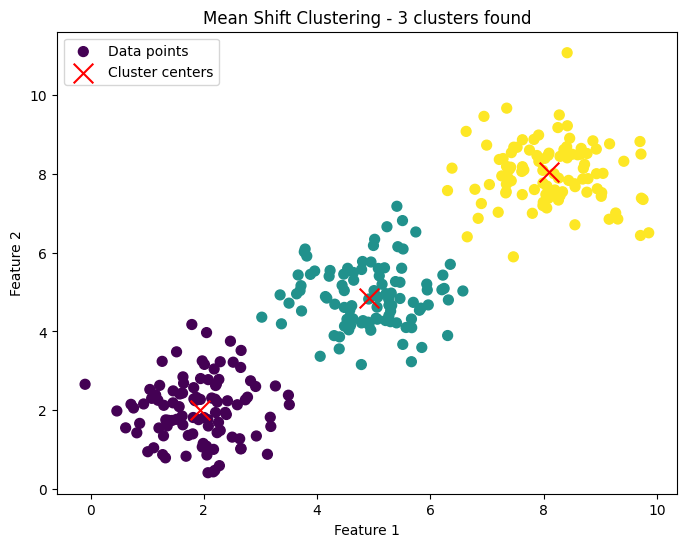

In [ ]:

centers = [[2, 2], [8, 8], [5, 5]]  
X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=0.8, random_state=42)


mean_shift = MeanShift(bandwidth=2)  


mean_shift.fit(X)

labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_


n_clusters = len(np.unique(labels))
print(f'Number of clusters found: {n_clusters}')


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, label='Data points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.title(f'Mean Shift Clustering - {n_clusters} clusters found')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Exception ignored on calling ctypes callback function <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f80a31c0b80>:
Traceback (most recent call last):
  File "/home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
  File "/home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.13/ctypes/__init__.py", line 390, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/numpy.libs/libscipy_openblas64_-8fb3d286.so: 

Number of clusters found: 3


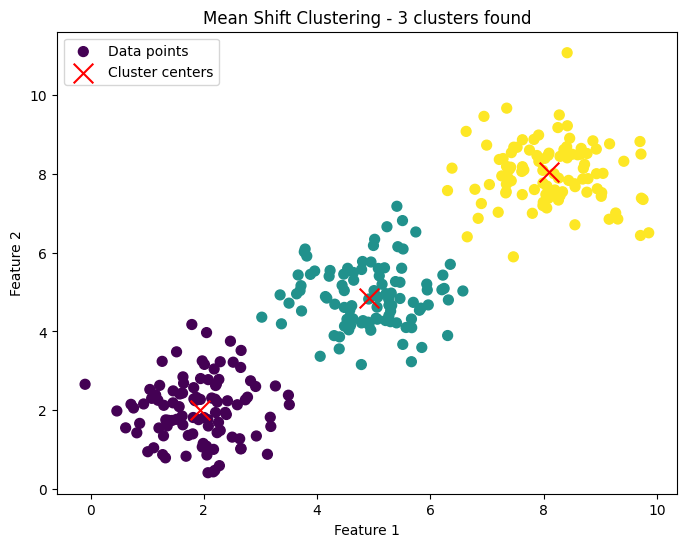

In [25]:


centers = [[2, 2], [8, 8], [5, 5]]  
X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=0.8, random_state=42)

mean_shift = MeanShift(bandwidth=2)  

mean_shift.fit(X)

labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

n_clusters = len(np.unique(labels))
print(f'Number of clusters found: {n_clusters}')

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, label='Data points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.title(f'Mean Shift Clustering - {n_clusters} clusters found')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:

bw = cv2.imread('./noise2.png', 0)
height, width = bw.shape[0:2]
cv2.imshow("Original BW", bw)

binary = np.zeros([height, width, 1], 'uint8')

thresh = 85

for row in range(0, height):
    for col in range(0, width):
        if bw[row][col] > thresh:
            binary[row][col] = 255

cv2.imshow("Slow Binary", binary)

cv2.waitKey(0)
cv2.destroyAllWindows()

# **Adaptive Thresholding**

In [ ]:


img = cv2.imread('./noise2.png', 0)
cv2.imshow("Original", img)


ret, thresh_basic = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
cv2.imshow("Basic Binary", thresh_basic)

thres_adapt = cv2.adaptiveThreshold(
    img, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11,
    2
)
cv2.imshow("Adaptive Threshold", thres_adapt)

cv2.waitKey(0)
cv2.destroyAllWindows()

Running complete pipeline with K-means...
Step 1: Extracting orange color using K-means...
Step 2: Applying contrast enhancement and adaptive thresholding...
Step 3: Removing noise...


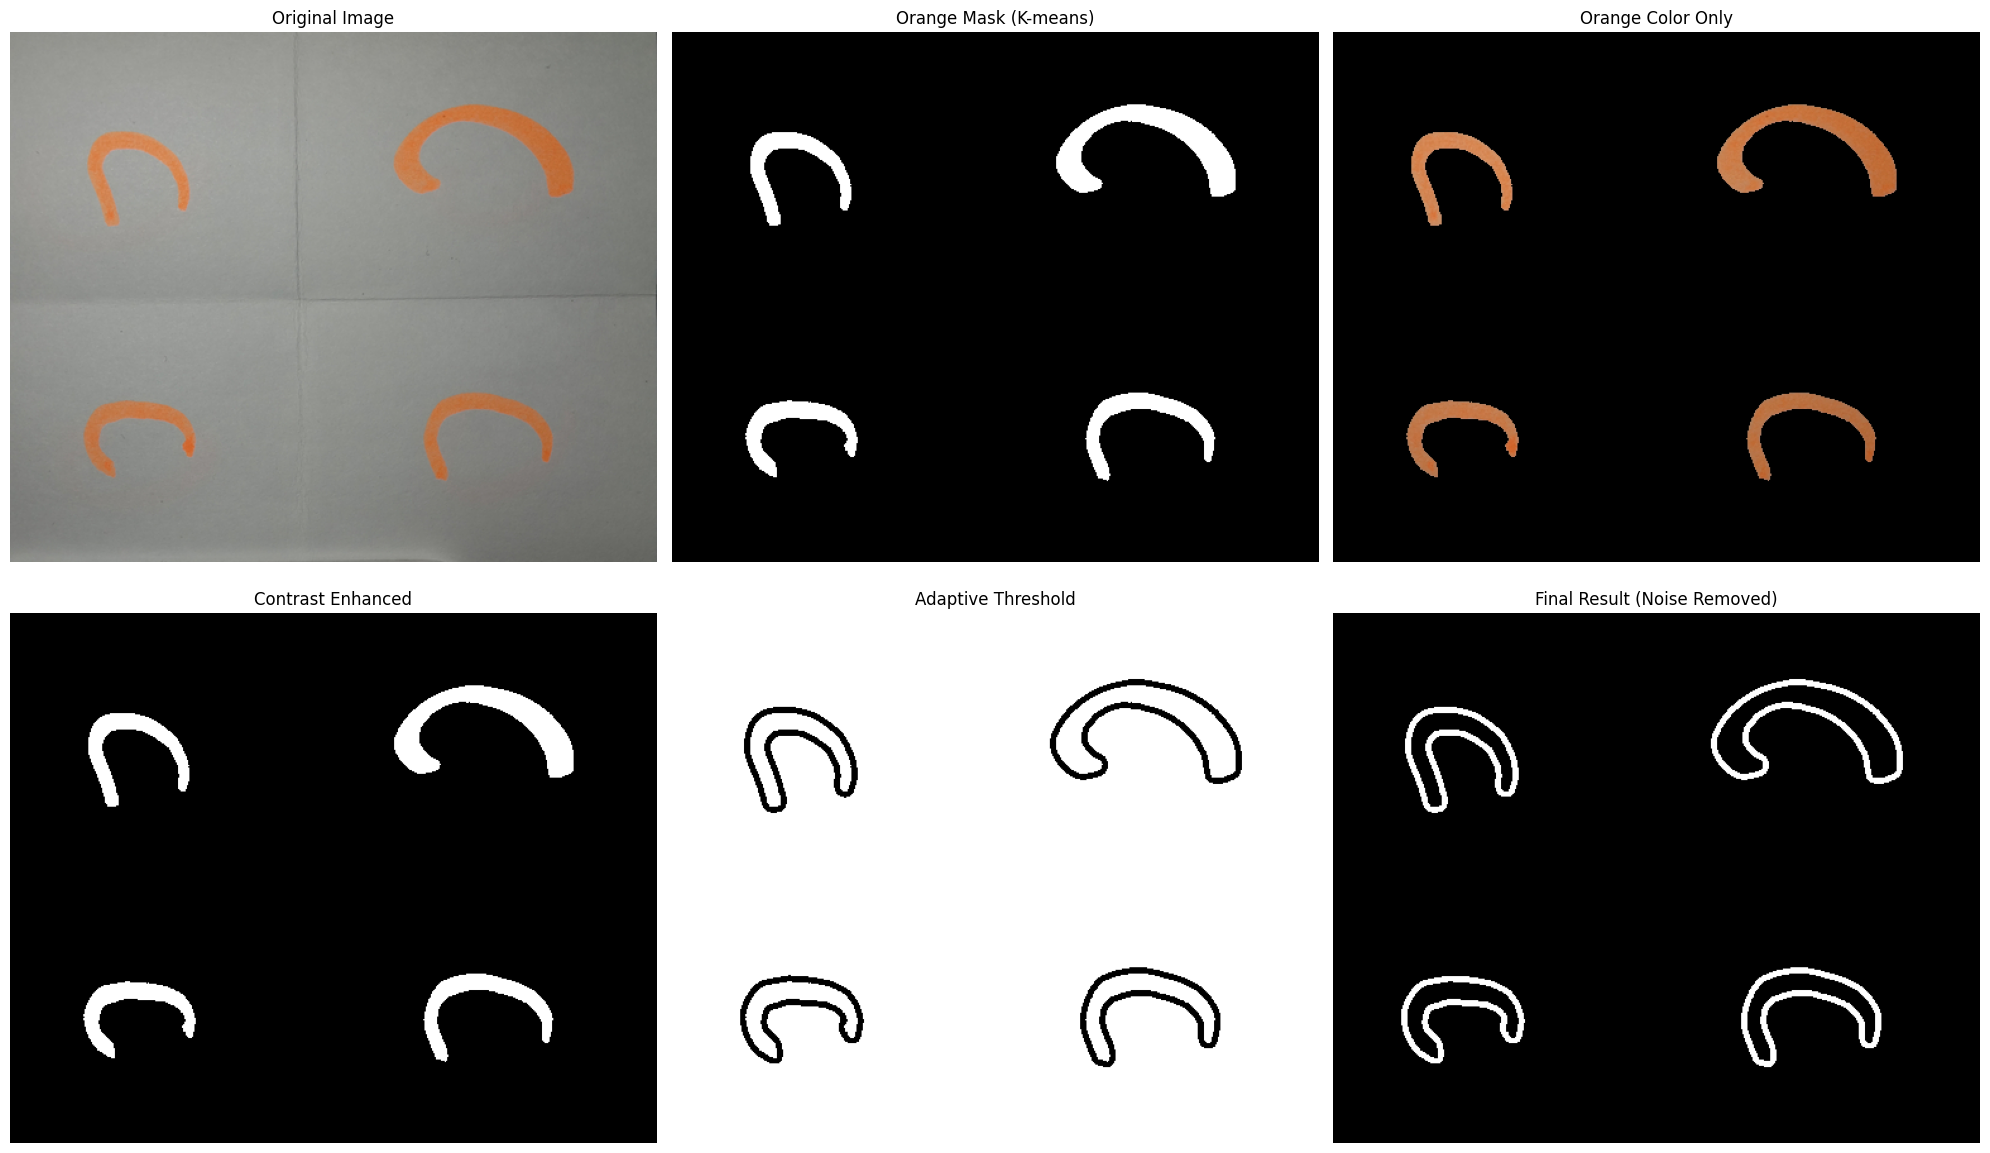


Running simplified HSV-based approach...


In [ ]:


def extract_orange_color_kmeans(image_path, n_clusters=3):
    """Extract orange color using K-means clustering"""
    # Read the image in BGR format
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Reshape image to be a list of pixels
    pixels = image_rgb.reshape(-1, 3)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    # Find the cluster that represents orange color
    # Orange is typically high in red, medium in green, low in blue
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate "orangeness" score for each cluster
    orangeness_scores = []
    for center in cluster_centers:
        r, g, b = center
        # Orange has high red, medium green, low blue
        score = r - abs(g - 120) - b  # Adjust weights as needed
        orangeness_scores.append(score)
    
    # Select the most orange cluster
    orange_cluster = np.argmax(orangeness_scores)
    
    # Create mask for orange pixels
    labels = kmeans.labels_.reshape(image_rgb.shape[0], image_rgb.shape[1])
    orange_mask = (labels == orange_cluster).astype(np.uint8) * 255
    
    # Apply mask to original image
    orange_only = cv2.bitwise_and(image_rgb, image_rgb, mask=orange_mask)
    
    return orange_mask, orange_only, image_rgb

def enhance_contrast_and_threshold(mask):
    """Enhance contrast and apply adaptive thresholding"""
    # Convert mask to grayscale if it's not already
    if len(mask.shape) == 3:
        mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    else:
        mask_gray = mask
    
    # Enhance contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced = clahe.apply(mask_gray)
    
    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(
        contrast_enhanced, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        11, 
        2
    )
    
    return adaptive_thresh, contrast_enhanced

def remove_noise(binary_image):
    """Remove noise using morphological operations"""
    # Define kernel for morphological operations
    kernel = np.ones((3,3), np.uint8)
    
    # Apply opening (erosion followed by dilation) to remove small noise
    cleaned = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    
    # Apply closing (dilation followed by erosion) to fill small holes
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
    
    # Optional: Remove small connected components
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(cleaned, connectivity=8)
    sizes = stats[1:, -1]
    nb_components = nb_components - 1
    
    # Minimum size of particles we want to keep (adjust based on your image)
    min_size = 50
    
    cleaned_final = np.zeros_like(cleaned)
    for i in range(0, nb_components):
        if sizes[i] >= min_size:
            cleaned_final[output == i + 1] = 255
    
    return cleaned_final

def complete_pipeline(image_path):
    """Complete pipeline for orange text extraction"""
    # Step 1: Extract orange color using K-means
    print("Step 1: Extracting orange color using K-means...")
    orange_mask, orange_only, original = extract_orange_color_kmeans(image_path)
    
    # Step 2: Enhance contrast and apply adaptive thresholding
    print("Step 2: Applying contrast enhancement and adaptive thresholding...")
    adaptive_thresh, contrast_enhanced = enhance_contrast_and_threshold(orange_mask)
    
    # Step 3: Remove noise
    print("Step 3: Removing noise...")
    final_result = remove_noise(adaptive_thresh)
    
    # Convert to black background with white text
    final_black_bg = cv2.bitwise_not(final_result)
    
    # Display results
    plt.figure(figsize=(20, 12))
    
    plt.subplot(2, 3, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(orange_mask, cmap='gray')
    plt.title('Orange Mask (K-means)')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(orange_only)
    plt.title('Orange Color Only')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(contrast_enhanced, cmap='gray')
    plt.title('Contrast Enhanced')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title('Adaptive Threshold')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.imshow(final_black_bg, cmap='gray')
    plt.title('Final Result (Noise Removed)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return final_black_bg, orange_mask, adaptive_thresh

# Alternative simpler function using your existing code structure
def simple_orange_extraction(image_path):
    """Simplified version using color range detection"""
    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define orange color range in HSV (more robust than RGB)
    # Adjust these values based on your specific orange color
    lower_orange = np.array([5, 100, 100])    # Lower bound for orange
    upper_orange = np.array([15, 255, 255])   # Upper bound for orange
    
    # Create mask for orange color
    orange_mask = cv2.inRange(image_hsv, lower_orange, upper_orange)
    
    # Apply mask
    orange_only = cv2.bitwise_and(image_rgb, image_rgb, mask=orange_mask)
    
    # Convert to grayscale for thresholding
    gray = cv2.cvtColor(orange_only, cv2.COLOR_RGB2GRAY)
    
    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(
        gray, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        11, 
        2
    )
    
    # Remove noise
    kernel = np.ones((2,2), np.uint8)
    cleaned = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, kernel)
    
    # Invert to get black background
    final_result = cv2.bitwise_not(cleaned)
    
    return final_result, orange_mask, adaptive_thresh

# Usage example:
if __name__ == "__main__":
    image_path = './noise2.png'  # Replace with your image path
    
    # Method 1: Complete pipeline with K-means
    print("Running complete pipeline with K-means...")
    final_result, orange_mask, adaptive_thresh = complete_pipeline(image_path)
    
    # Method 2: Simpler HSV-based approach (often more reliable for color detection)
    print("\nRunning simplified HSV-based approach...")
    final_simple, orange_mask_simple, adaptive_simple = simple_orange_extraction(image_path)
    
    # Display comparison
    cv2.imshow("K-means Result", final_result)
    cv2.imshow("HSV-based Result", final_simple)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans

def extract_orange_kmeans(image_path, n_clusters=3):
    """Extract only orange parts using K-means and remove everything else with white background"""
    
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Reshape image to be a list of pixels
    pixels = image_rgb.reshape(-1, 3)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    # Get cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_.reshape(image_rgb.shape[0], image_rgb.shape[1])
    
    # Find the most orange cluster
    # Orange typically has high red, medium green, low blue
    orangeness_scores = []
    for center in cluster_centers:
        r, g, b = center
        # Higher score means more orange-like
        score = r * 0.8 - g * 0.5 - b * 0.3
        orangeness_scores.append(score)
    
    orange_cluster_idx = np.argmax(orangeness_scores)
    
    # Create result image with white background
    result = np.ones_like(image_rgb) * 255  # White background
    
    # Copy only orange pixels from original image
    orange_mask = labels == orange_cluster_idx
    result[orange_mask] = image_rgb[orange_mask]
    
    return result, orange_mask

# Usage
image_path = './noise2.png'  # Your image path

# Extract orange parts
orange_only_image, mask = extract_orange_kmeans(image_path)

# Display results
cv2.imshow("Original", cv2.imread(image_path))
cv2.imshow("Orange Only (White Background)", cv2.cvtColor(orange_only_image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the result if needed
cv2.imwrite('orange_only_white_bg.png', cv2.cvtColor(orange_only_image, cv2.COLOR_RGB2BGR))

True

In [ ]:

image = cv2.imread('./noise2.png')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Method 1: Using color thresholding (recommended for specific color conversion)
def convert_orange_to_black_threshold(image):
    # Convert to HSV color space for better color segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define range for orange color in HSV
    # Orange hue is typically between 5-20 in OpenCV HSV (0-180 range)
    lower_orange1 = np.array([5, 100, 100])
    upper_orange1 = np.array([15, 255, 255])
    
    # Create mask for orange color
    mask = cv2.inRange(hsv, lower_orange1, upper_orange1)
    
    # Convert orange pixels to black in the original image
    result = image.copy()
    result[mask > 0] = [0, 0, 0]  # Set to black in BGR
    
    return result

result_image = convert_orange_to_black_threshold(image)

# Save the result
cv2.imwrite('output.png', result_image)

print("Image processed successfully! Orange color converted to black.")

Image processed successfully! Orange color converted to black.


## Adaptive Thresholdding

In [ ]:

img = cv2.imread('./output.png', 0)
cv2.imshow("Original", img)

ret, thresh_basic = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
cv2.imshow("Basic Binary", thresh_basic)


thres_adapt = cv2.adaptiveThreshold(
    img, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11,
    2
)
cv2.imshow("Adaptive Threshold", thres_adapt)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2

# Read the image in grayscale
img = cv2.imread('./output.png', 0)
cv2.imshow("Original", img)

# Apply basic binary threshold
ret, thresh_basic = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
cv2.imshow("Basic Binary", thresh_basic)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Face detection

In [ ]:
img = cv2.imread("./img/faces.jpeg",1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
path = "haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(path)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.10, minNeighbors=5, minSize=(40,40))
print(len(faces))

for (x, y, w, h) in faces:
   cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

24


# Ear detection

In [5]:
import cv2
import numpy as np

def detect_ears(image_path=None, use_webcam=False):
    """
    Detect ears in an image or from webcam feed using Haar Cascade
    
    Args:
        image_path: Path to image file (if not using webcam)
        use_webcam: Boolean to use webcam feed
    """
    
    # Load the Haar Cascade for ear detection
    ear_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_leftear.xml')
    
    if use_webcam:
        # Open webcam
        cap = cv2.VideoCapture(0)
        
        print("Press 'q' to quit")
        
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            
            # Convert to grayscale
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # Detect ears
            ears = ear_cascade.detectMultiScale(
                gray,
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(30, 30)
            )
            
            # Draw rectangles around detected ears
            for (x, y, w, h) in ears:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(frame, 'Ear', (x, y-10), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            
            # Display number of ears detected
            cv2.putText(frame, f'Ears detected: {len(ears)}', (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            
            cv2.imshow('Ear Detection', frame)
            
            # Break loop on 'q' press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
        cap.release()
        cv2.destroyAllWindows()
    
    else:
        # Load image from file
        if image_path is None:
            print("Please provide an image path or set use_webcam=True")
            return
        
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not load image from {image_path}")
            return
        
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Detect ears
        ears = ear_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )
        
        print(f"Number of ears detected: {len(ears)}")
        
        # Draw rectangles around detected ears
        for (x, y, w, h) in ears:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, 'Ear', (x, y-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        
        # Display the result
        cv2.imshow('Ear Detection', img)
        print("Press any key to close the window")
        cv2.waitKey(0)
        cv2.destroyAllWindows()


def detect_ears_both_sides(image_path=None, use_webcam=False):
    """
    Detect both left and right ears using multiple cascades
    """
    
    # Load cascades for both ears
    left_ear_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_leftear.xml')
    right_ear_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_rightear.xml')
    
    if use_webcam:
        cap = cv2.VideoCapture(0)
        print("Press 'q' to quit")
        
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # Detect left ears
            left_ears = left_ear_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30, 30))
            # Detect right ears
            right_ears = right_ear_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30, 30))
            
            # Draw left ears in green
            for (x, y, w, h) in left_ears:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(frame, 'Left Ear', (x, y-10), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            
            # Draw right ears in blue
            for (x, y, w, h) in right_ears:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
                cv2.putText(frame, 'Right Ear', (x, y-10), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
            
            total_ears = len(left_ears) + len(right_ears)
            cv2.putText(frame, f'Total ears: {total_ears}', (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
            
            cv2.imshow('Ear Detection (Both Sides)', frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
        cap.release()
        cv2.destroyAllWindows()


# Example usage:
if __name__ == "__main__":
    # Option 1: Use webcam for real-time detection
    # detect_ears(use_webcam=True)
    
    # Option 2: Detect ears in a static image
    detect_ears(image_path='./ear.jpg')
    
    # Option 3: Detect both left and right ears
    # detect_ears_both_sides(use_webcam=True)

[ERROR:0@94.976] global persistence.cpp:566 open Can't open file: '/home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/cv2/data/haarcascade_mcs_leftear.xml' in read mode


error: OpenCV(4.12.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'
